In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv


In [63]:
train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")

In [64]:
train.head()


,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,Clear,63,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,Clear,53,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,Clear,35,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,Stormy,83,0
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,Clear,26,0


### Task 1: Data Exploration and Preparation (1 mark)

- Conduct exploratory data analysis to identify trends, patterns, and anomalies in fare data for each vehicle type (bikes, autos, and cars) in Quahog City.
- Using appropriate visualizations and techniques, provide an in-depth analysis on the nature of the average fare and other features in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63015 entries, 0 to 63014
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            63015 non-null  datetime64[ns]
 1   average_fare         63015 non-null  float64       
 2   rides_completed      63015 non-null  int64         
 3   driver_availability  63015 non-null  float64       
 4   surge_multiplier     63015 non-null  float64       
 5   vehicle_type         63015 non-null  object        
 6   weather              63015 non-null  object        
 7   traffic_index        63015 non-null  int64         
 8   special_event        63015 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 4.3+ MB
None
                 timestamp  average_fare  rides_completed  \
count                63015  63015.000000     63015.000000   
mean   2022-03-14 14:00:00     70.186256       376.739760

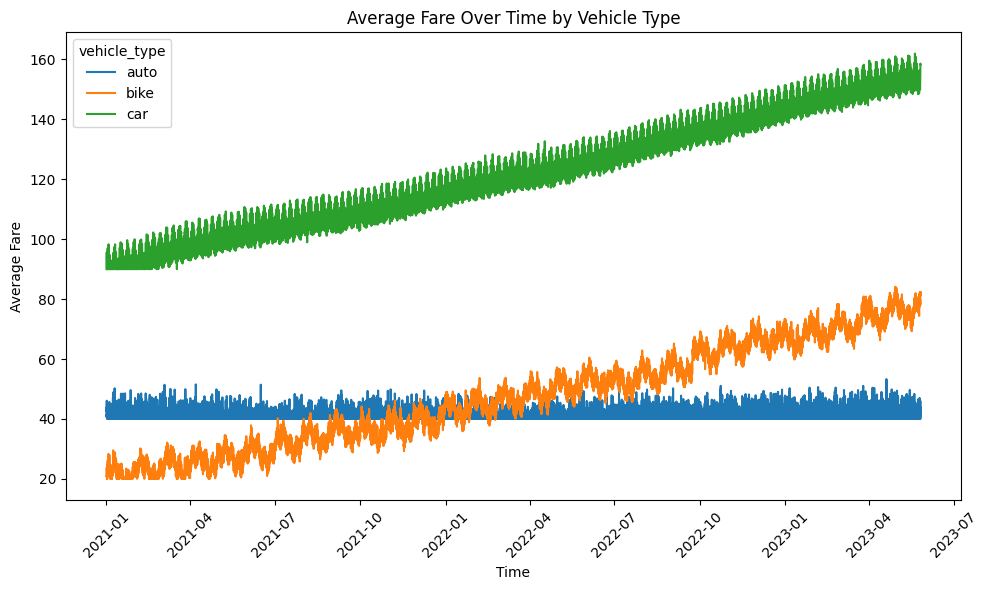

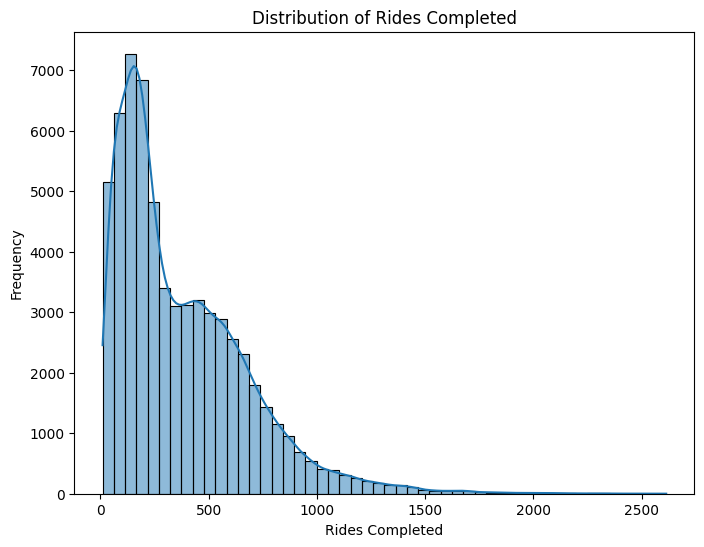

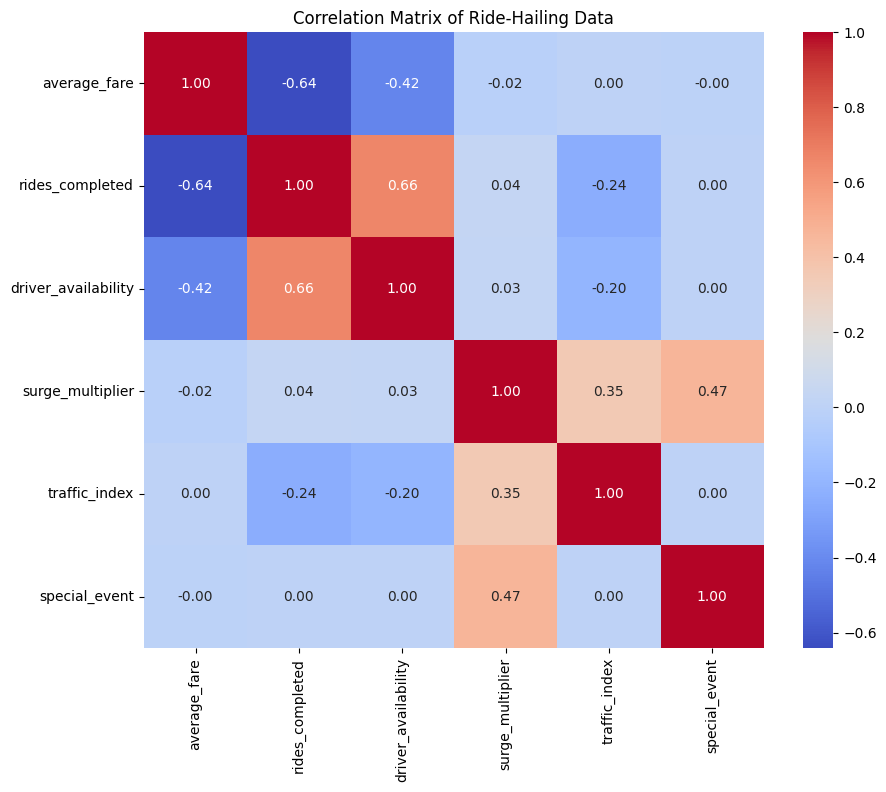

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])

print(train.info())
print(train.describe())

missing_values = train.isnull().sum()
print("Missing values in each column:\n", missing_values)

train.dropna(inplace=True)

train['vehicle_type'] = train['vehicle_type'].astype('category')
train['weather'] = train['weather'].astype('category')

warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.lineplot(data=train, x='timestamp', y='average_fare', hue='vehicle_type')
plt.title("Average Fare Over Time by Vehicle Type")
plt.xlabel("Time")
plt.ylabel("Average Fare")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(train['rides_completed'], bins=50, kde=True)
plt.title("Distribution of Rides Completed")
plt.xlabel("Rides Completed")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Ride-Hailing Data")
plt.show()



# Trend   
Overall Trend: The line plot for "Average Fare Over Time by Vehicle Type" shows a clear upward trend in fares across all vehicle types over time. This suggests a general increase in prices, which could be due to inflation, increased operational costs, or higher demand over the period shown.
Vehicle Type Differences: The trend lines for each vehicle type (auto, bike, and car) maintain consistent separations, with car fares significantly higher than bike and auto. This could reflect a structural difference in pricing across these categories, where cars are priced as a premium option compared to autos and bikes.
# Seasonality
Short-Term Fluctuations: The data shows periodic, small fluctuations, especially visible in the car and bike fare lines. This pattern may suggest weekly or monthly seasonality, potentially influenced by days of the week, holidays, or recurring events.
Seasonal Peaks and Troughs: Certain peaks and dips in average fares may correspond to specific times of high and low demand. For instance, fares might increase around holidays or weekends when demand typically spikes, and decline during weekdays or off-peak seasons.

# Correlation matrix

A negative correlation between average_fare and rides_completed and driver_availability, suggesting that higher fares might correspond with lower availability or fewer completed rides.
A moderate positive correlation between rides_completed and driver_availability, indicating that as more drivers are available, more rides tend to be completed.
surge_multiplier has a moderate positive correlation with traffic_index and special_event, suggesting that surge pricing increases with traffic levels and during special events

In [67]:
auto_testfinal = test[test['vehicle_type'] == 'auto']
car_testfinal = test[test['vehicle_type'] == 'car']
bike_testfinal = test[test['vehicle_type'] == 'bike']

In [68]:
# Split the train dataset into separate DataFrames for each vehicle type
auto_data = train[train['vehicle_type'] == 'auto']
car_data = train[train['vehicle_type'] == 'car']
bike_data = train[train['vehicle_type'] == 'bike']

# Display the first few rows of each split to verify
print("Auto Data:")
print(auto_data.head())

print("\nCar Data:")
print(car_data.head())

print("\nBike Data:")
print(bike_data.head())

#Checking the number of records in each split
print(f"\nNumber of records in Auto dataset: {len(auto_data)}")
print(f"Number of records in Car dataset: {len(car_data)}")
print(f"Number of records in Bike dataset: {len(bike_data)}")


Auto Data:
             timestamp  average_fare  rides_completed  driver_availability  \
2  2021-01-01 00:00:00     41.197085              239            39.110219   
5  2021-01-01 01:00:00     40.703086              137            30.000000   
8  2021-01-01 02:00:00     42.637278              244            37.599326   
11 2021-01-01 03:00:00     43.544152              195            34.819591   
13 2021-01-01 04:00:00     43.836443              129            30.000000   

    surge_multiplier vehicle_type weather  traffic_index  special_event  
2                1.0         auto   Clear             35              0  
5                1.3         auto   Clear             80              0  
8                1.4         auto   Clear             48              1  
11               1.0         auto  Cloudy             76              0  
13               1.2         auto   Rainy             55              0  

Car Data:
             timestamp  average_fare  rides_completed  driver_ava

In [69]:
auto_testfinal.set_index('timestamp',inplace=True)
bike_testfinal.set_index('timestamp',inplace=True)
car_testfinal.set_index('timestamp',inplace=True)


In [70]:
auto_data.set_index('timestamp', inplace=True)
car_data.set_index('timestamp', inplace=True)
bike_data.set_index('timestamp', inplace=True)

### Task 2: Time Series Characterization (1 mark)

- Building on your exploratory analysis, examine the time series characteristics of the average fare for each vehicle type in Quahog City.
- Implement the Holt and Holt-Winters methods to model and forecast the average fare for each vehicle type.
- Interpret the results and discuss the implications for RideWave's business.

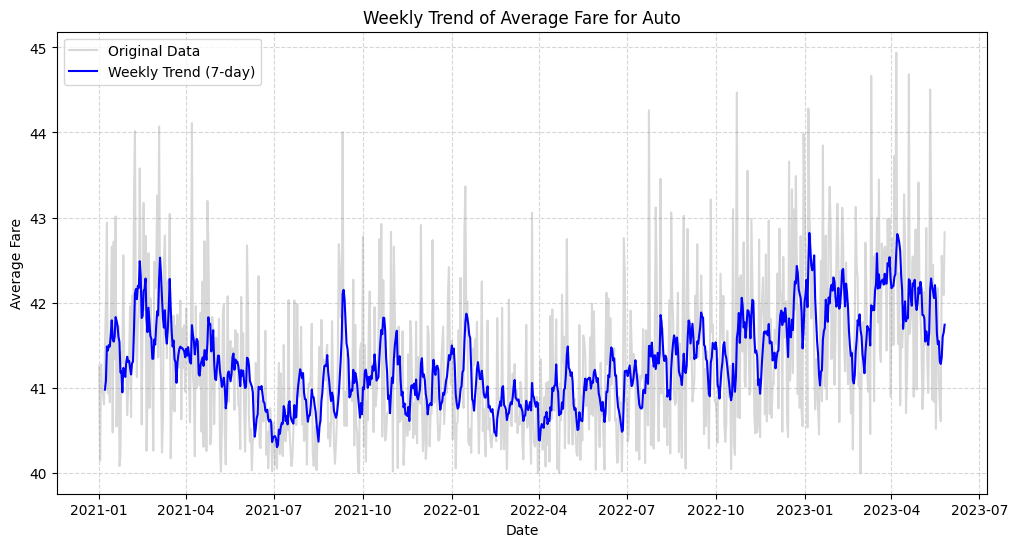

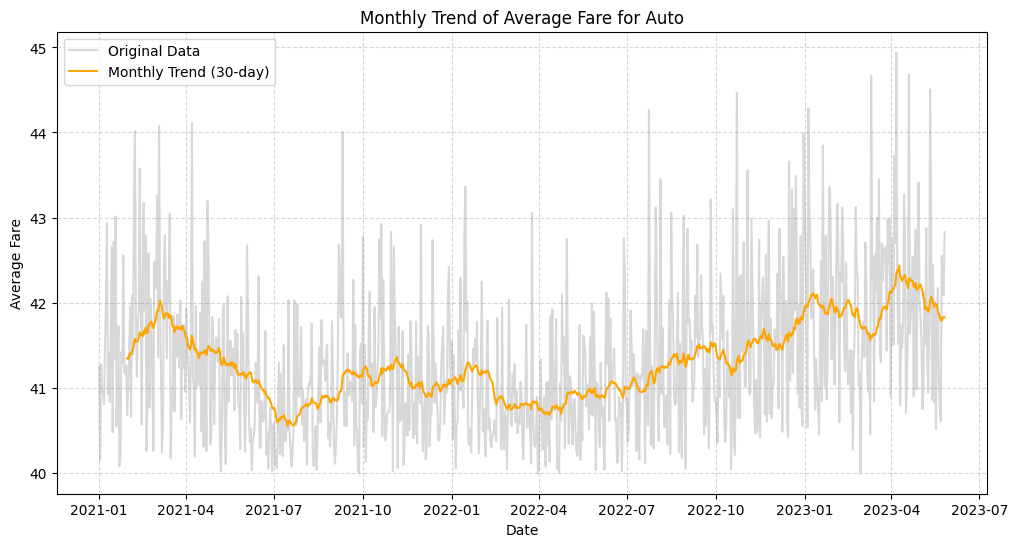

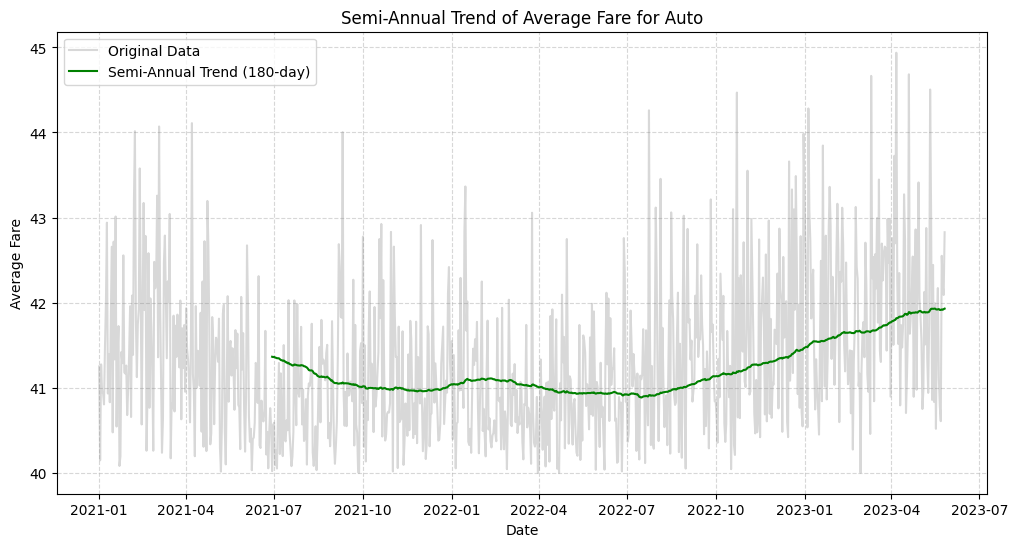

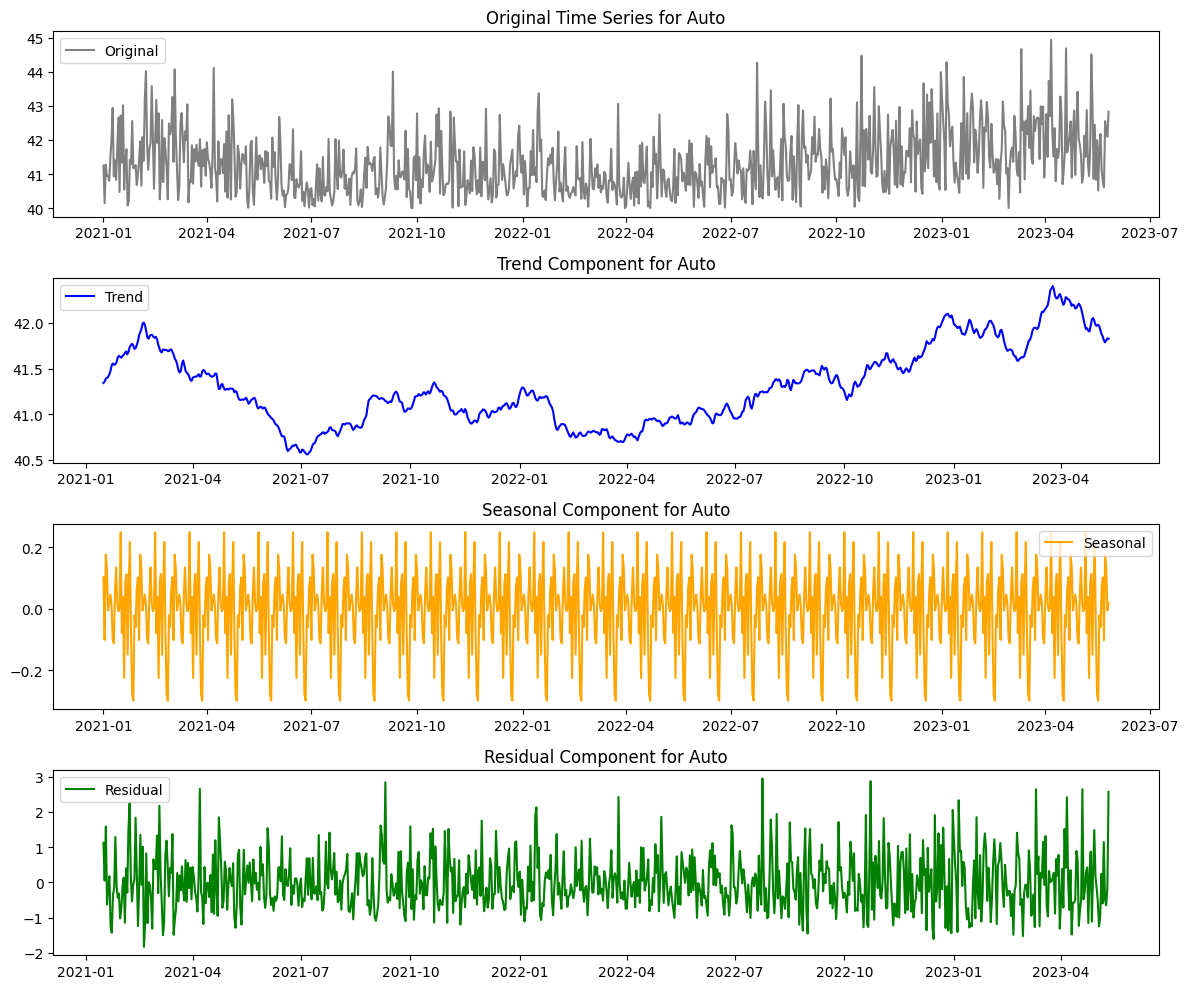

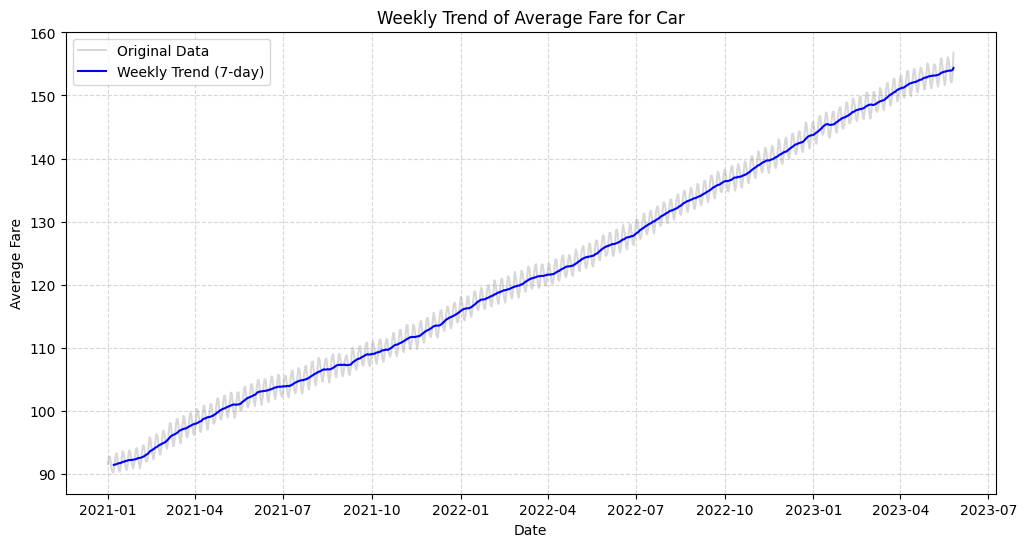

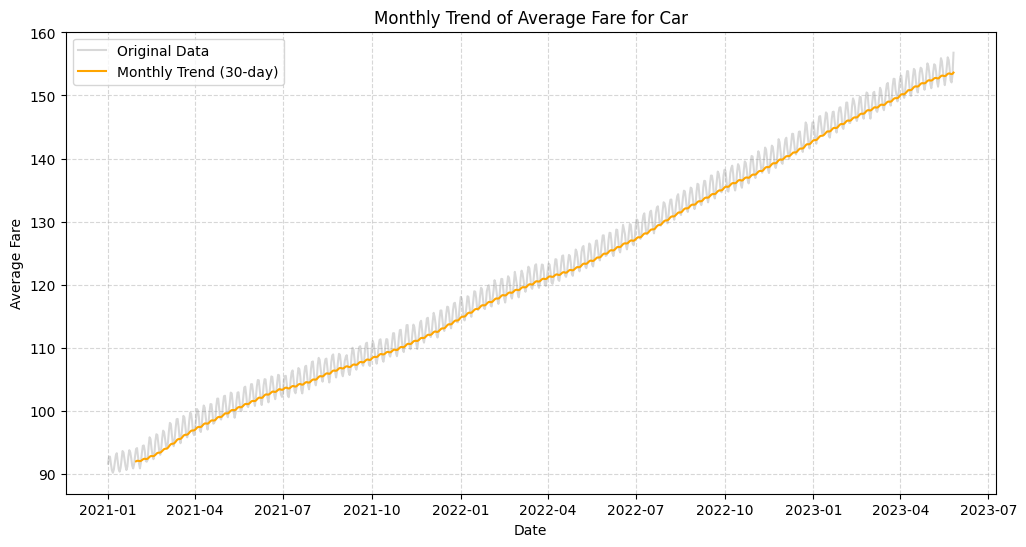

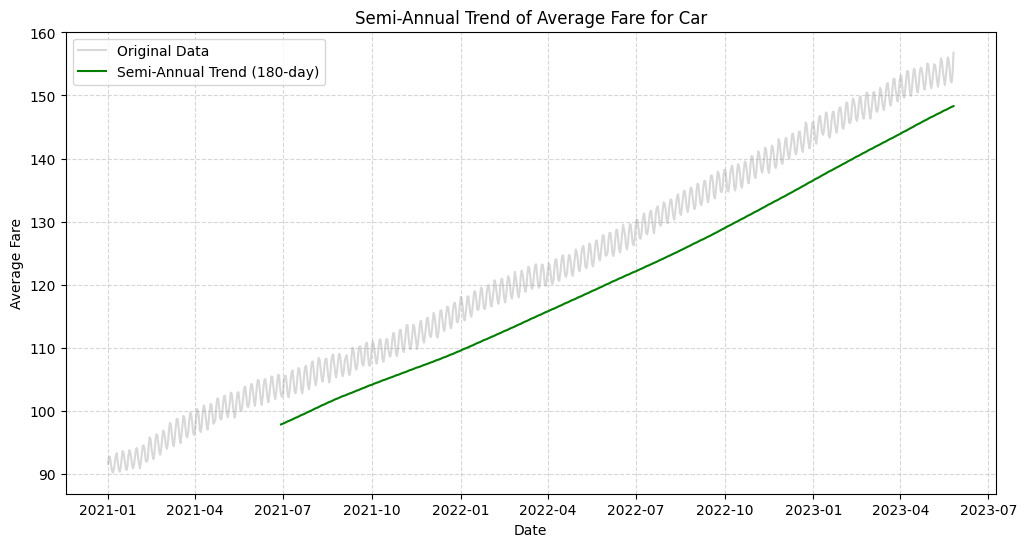

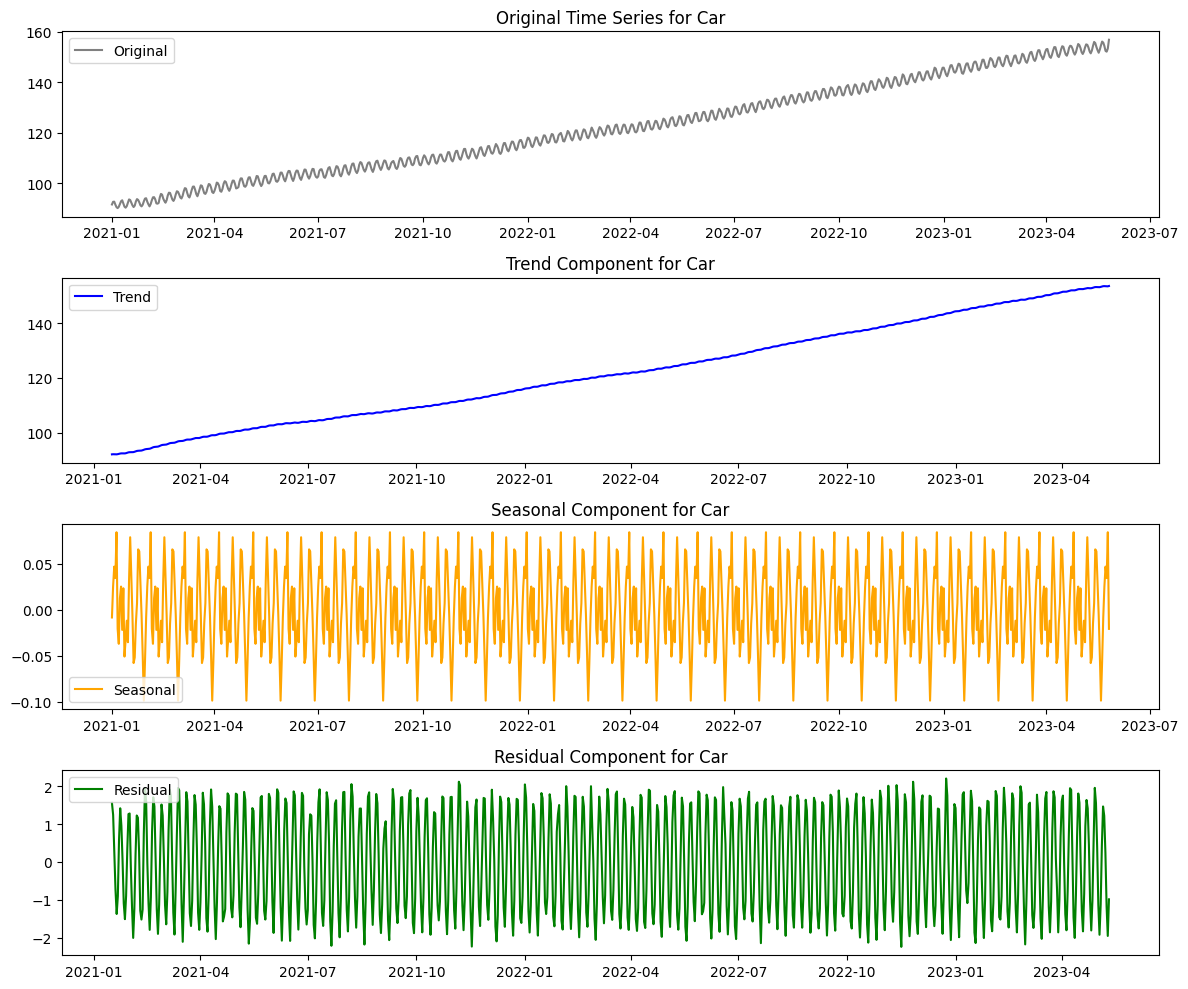

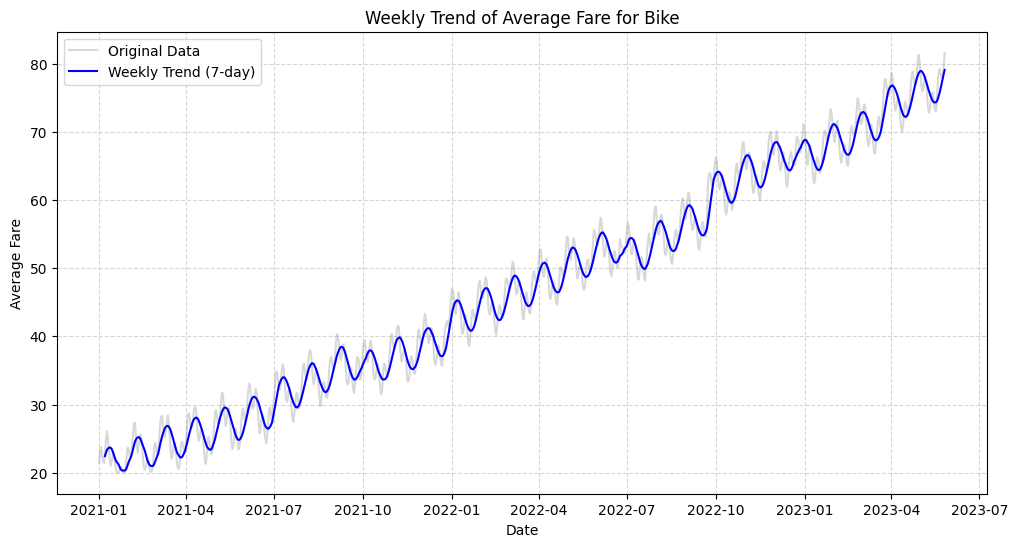

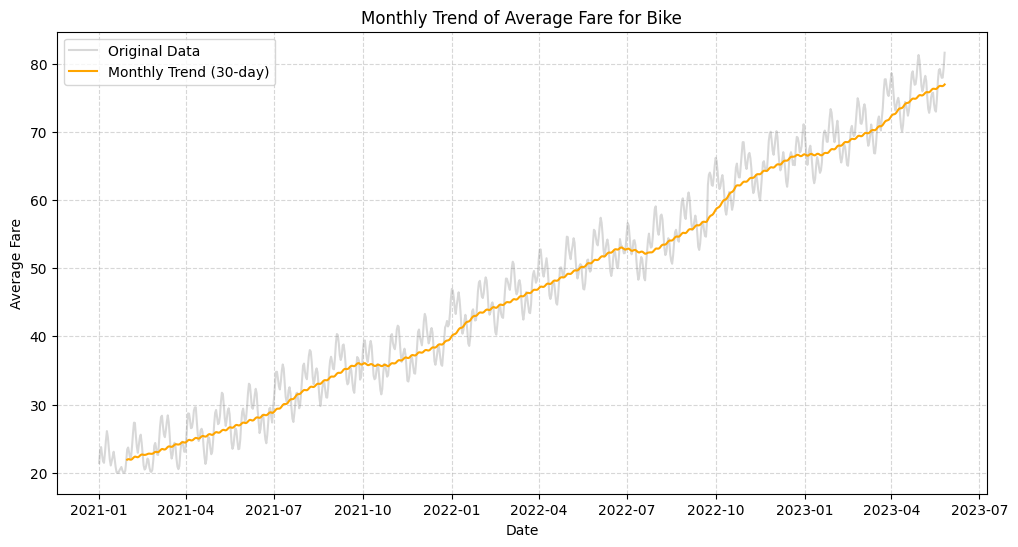

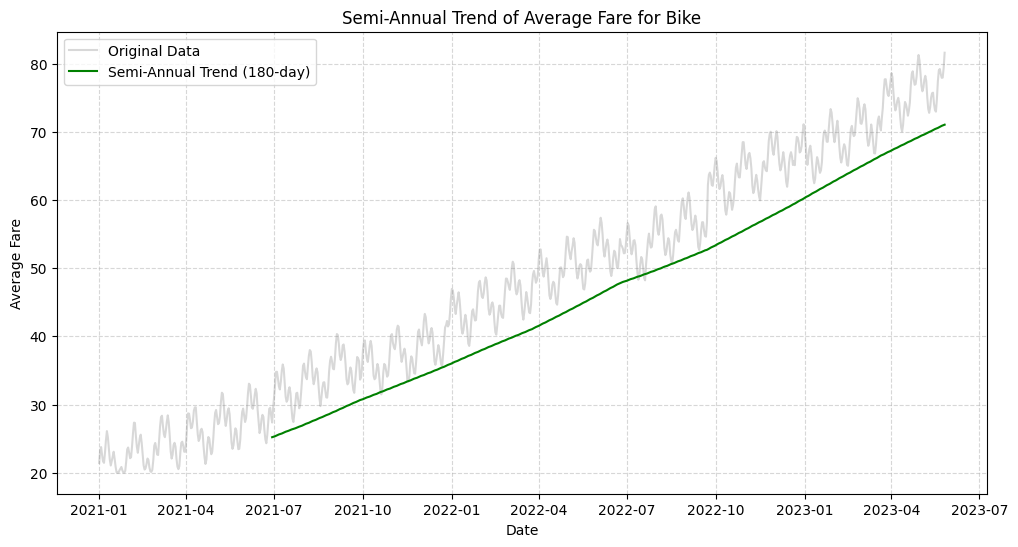

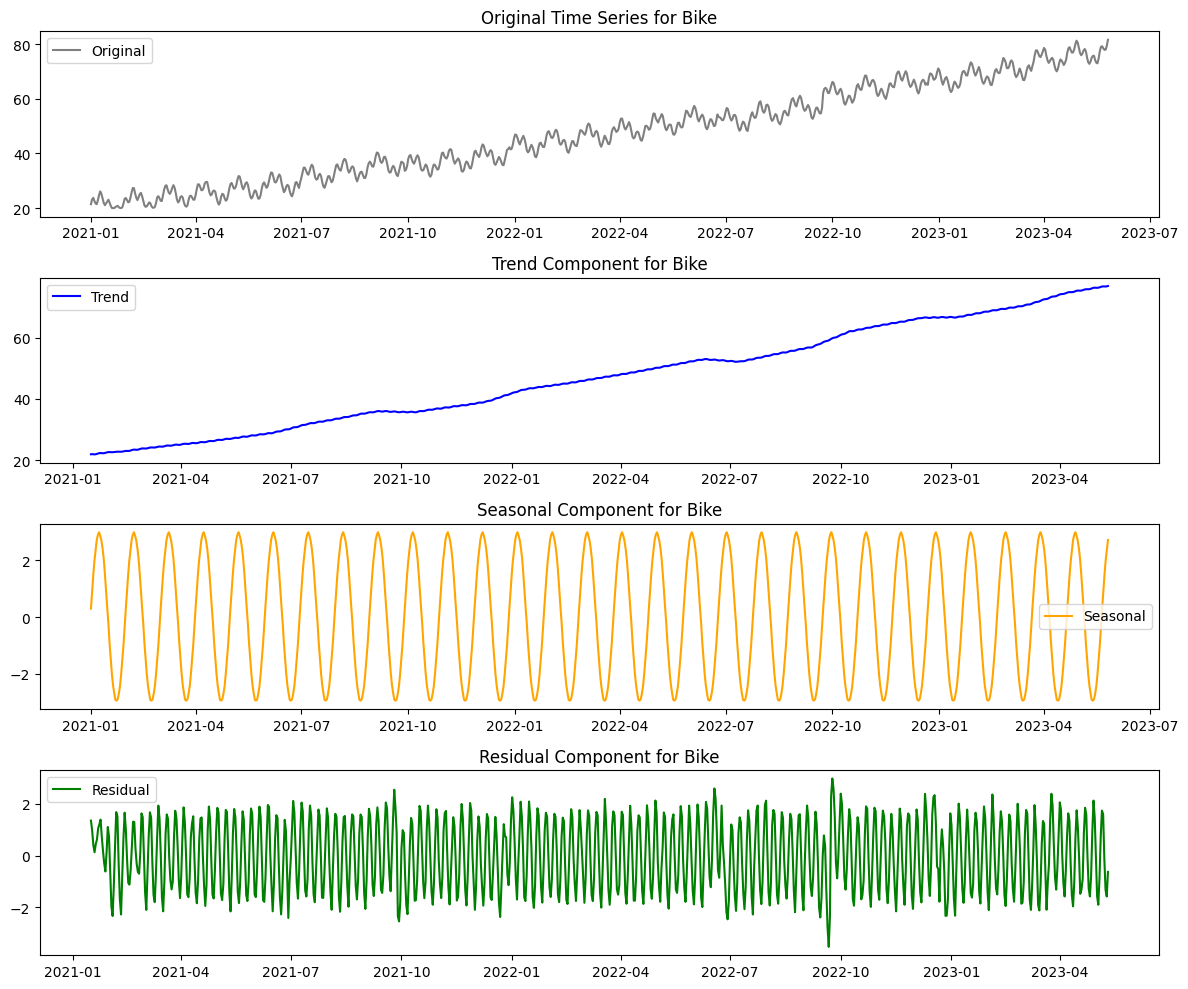

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


vehicle_data_dict = {'auto': auto_data, 'car': car_data, 'bike': bike_data}

for vehicle_name, vehicle_data in vehicle_data_dict.items():
    vehicle_data_daily = vehicle_data['average_fare'].resample('D').mean()

    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data_daily.index, vehicle_data_daily, alpha=0.3, color='gray', label="Original Data")
    plt.plot(vehicle_data_daily.index, vehicle_data_daily.rolling(window=7).mean(), color='blue', linestyle='-', label="Weekly Trend (7-day)")
    plt.title(f"Weekly Trend of Average Fare for {vehicle_name.capitalize()}")
    plt.ylabel("Average Fare")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data_daily.index, vehicle_data_daily, alpha=0.3, color='gray', label="Original Data")
    plt.plot(vehicle_data_daily.index, vehicle_data_daily.rolling(window=30).mean(), color='orange', linestyle='-', label="Monthly Trend (30-day)")
    plt.title(f"Monthly Trend of Average Fare for {vehicle_name.capitalize()}")
    plt.ylabel("Average Fare")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data_daily.index, vehicle_data_daily, alpha=0.3, color='gray', label="Original Data")
    plt.plot(vehicle_data_daily.index, vehicle_data_daily.rolling(window=180).mean(), color='green', linestyle='-', label="Semi-Annual Trend (180-day)")
    plt.title(f"Semi-Annual Trend of Average Fare for {vehicle_name.capitalize()}")
    plt.ylabel("Average Fare")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    decomposition = seasonal_decompose(vehicle_data_daily, model='additive', period=30)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 10))
    plt.subplot(4, 1, 1)
    plt.plot(vehicle_data_daily, label='Original', color='gray')
    plt.title(f"Original Time Series for {vehicle_name.capitalize()}")
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend', color='blue')
    plt.title(f"Trend Component for {vehicle_name.capitalize()}")
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonal', color='orange')
    plt.title(f"Seasonal Component for {vehicle_name.capitalize()}")
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual', color='green')
    plt.title(f"Residual Component for {vehicle_name.capitalize()}")
    plt.legend()

    plt.tight_layout()
    plt.show()



# Weekly Trend of Average Fare for Auto:

The first plot shows the weekly trend of average fares, with a blue line representing the moving average (weekly rolling average of 7 days). The grey line in the background represents the raw fare data.
This plot smooths the data over a short period to highlight weekly trends and reduce daily fluctuations.
# Monthly Trend of Average Fare for Auto:

The second plot displays a monthly trend of average fares. The orange line represents the 30-day rolling average, while the grey line shows the original data.
This longer smoothing window helps reveal patterns on a monthly scale, making it easier to observe medium-term trends.
# Semi-Annual Trend of Average Fare for Auto:

The third plot shows a semi-annual trend, with a green line representing a 180-day moving average.
This plot highlights long-term trends over approximately six months, smoothing out short-term variations and capturing seasonal trends or general long-term movement.



# Weekly Trend of Average Fare for Car:

The plot shows a steady increase in the weekly average fare for cars. The blue line represents the 7-day moving average, smoothing out short-term fluctuations and highlighting weekly trends.
# Monthly Trend of Average Fare for Car:

This plot uses a 30-day rolling average, represented by the orange line, which smooths the data further. It shows a clear upward trend in fares at the monthly level.
# Semi-Annual Trend of Average Fare for Car:

The 180-day moving average (green line) is used here, showing a clear, long-term upward trend in car fares with minimal short-term variability.


# Weekly Trend of Average Fare for Bike:

The weekly trend, with a 7-day moving average (blue line), shows a gradual increase in fares, with periodic fluctuations.
# Monthly Trend of Average Fare for Bike:

Using a 30-day moving average (orange line), this plot smooths the data to reveal a more consistent monthly upward trend.
# Semi-Annual Trend of Average Fare for Bike:

A 180-day moving average (green line) illustrates a clear long-term increasing trend in fares with more subtle short-term variations.

# Original Time Series and Decomposition of Average Fare:

This section contains a decomposition of the time series into its fundamental components:  
Original Time Series (top): Shows the raw data without any smoothing or transformations.  
Trend Component (second): Extracted trend over time, focusing on the long-term movement of average fares.  
Seasonal Component (third): Captures repeating patterns or seasonal cycles, showing regular fluctuations that occur at consistent intervals.  
Residual Component (bottom): Represents the random or irregular variation in the data, which is not explained by trend or seasonality. 

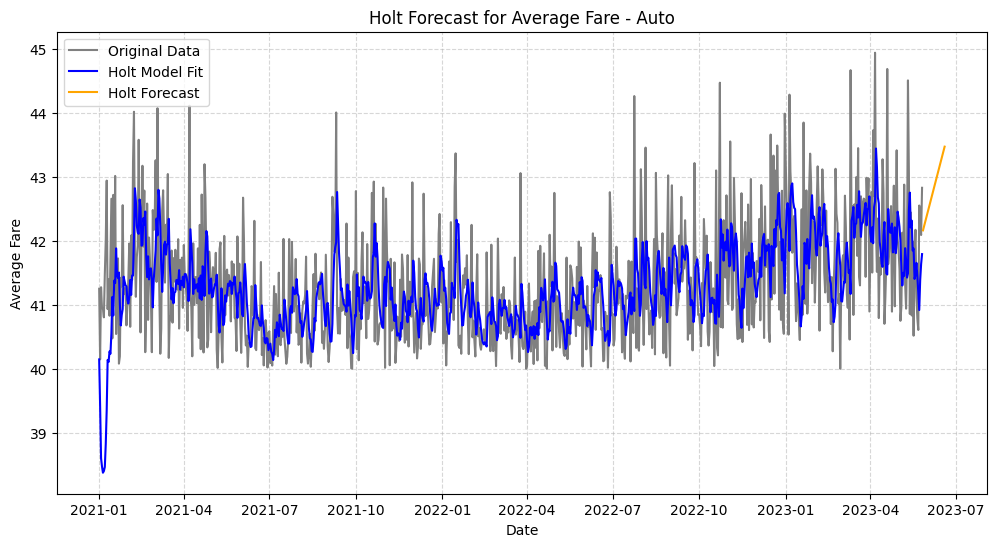

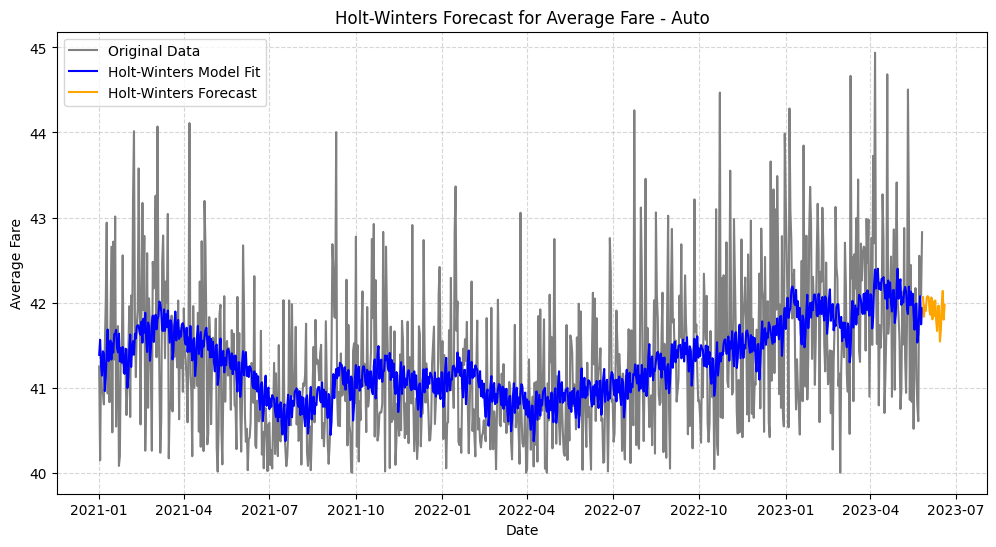

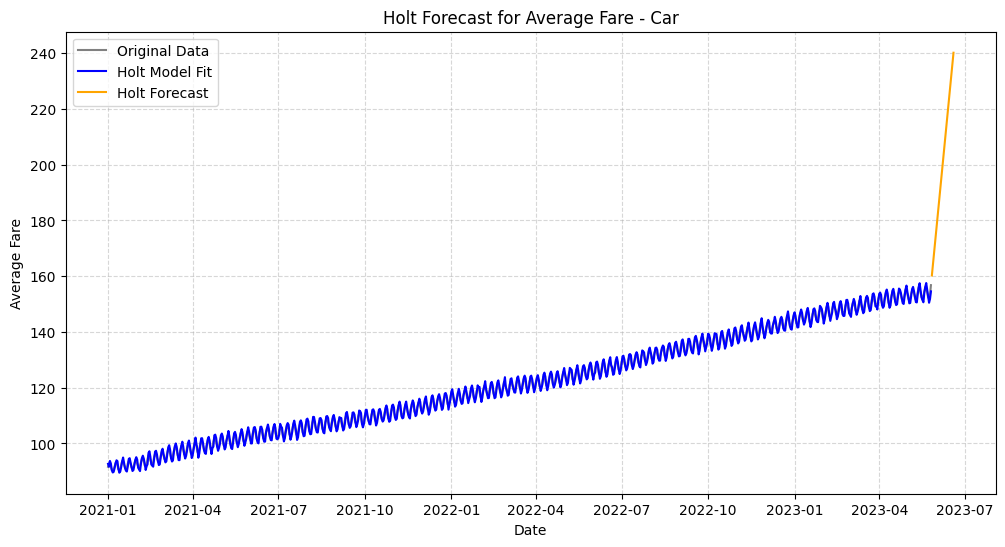

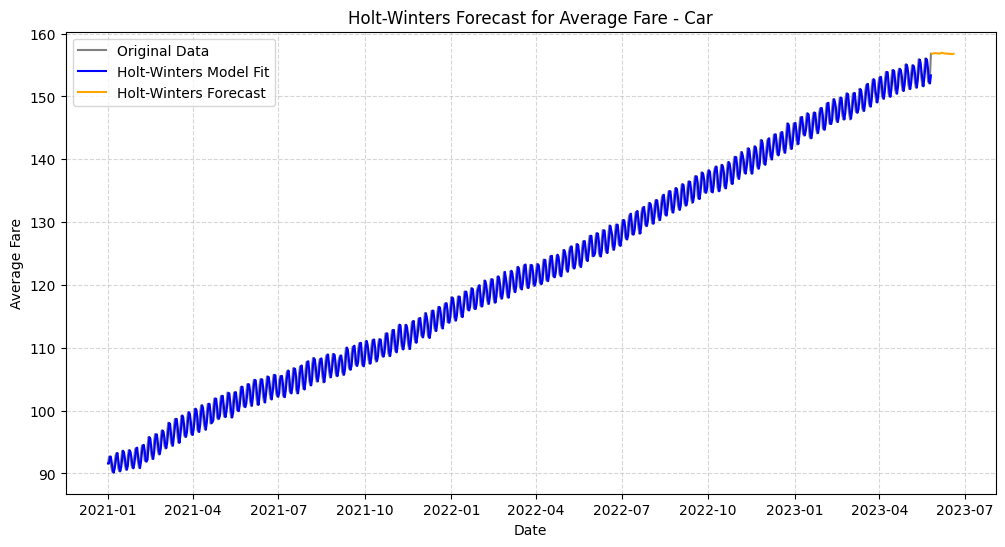

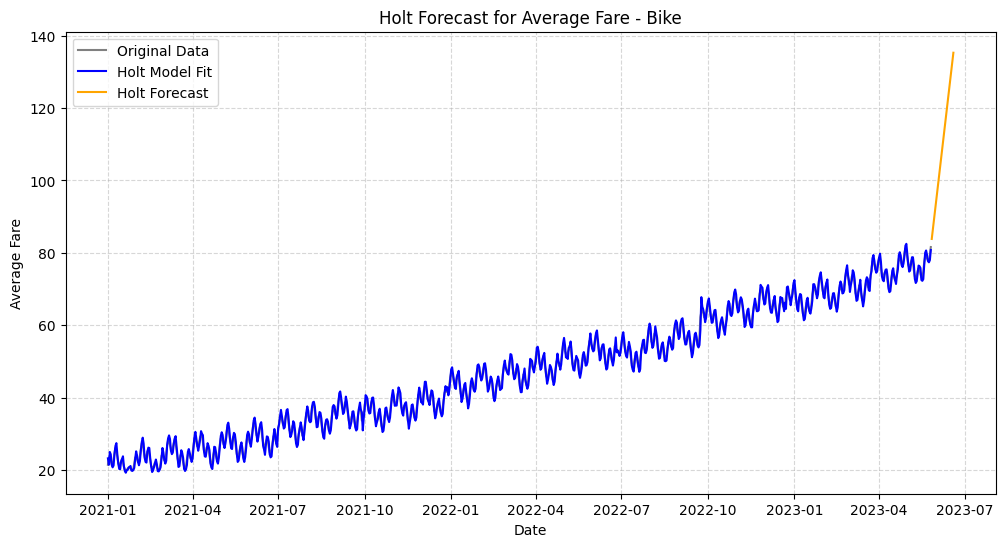

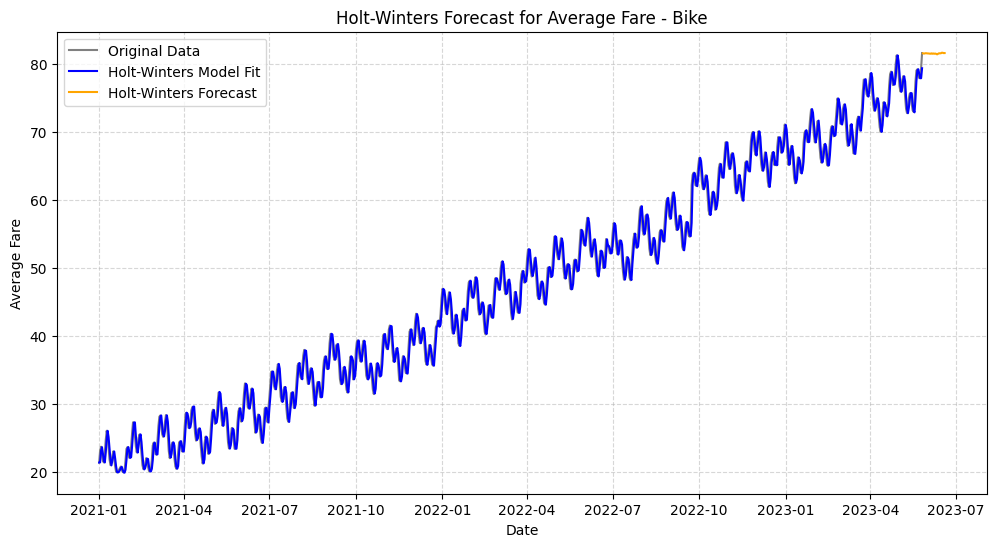

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt


vehicle_data_dict = {'auto': auto_data, 'car': car_data, 'bike': bike_data}

for vehicle_name, vehicle_data in vehicle_data_dict.items():
    vehicle_data_daily = vehicle_data['average_fare'].resample('D').mean()

    
    holt_model = Holt(vehicle_data_daily).fit()
    holt_forecast = holt_model.forecast(steps=24)

    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data_daily.index, vehicle_data_daily, label='Original Data', color='gray')
    plt.plot(holt_model.fittedvalues.index, holt_model.fittedvalues, label='Holt Model Fit', color='blue')
    plt.plot(holt_forecast.index, holt_forecast, label='Holt Forecast', color='orange')
    plt.title(f'Holt Forecast for Average Fare - {vehicle_name.capitalize()}')
    plt.ylabel('Average Fare')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

   
    hw_model = ExponentialSmoothing(vehicle_data_daily, seasonal='add', seasonal_periods=24).fit()
    hw_forecast = hw_model.forecast(steps=24)
    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data_daily.index, vehicle_data_daily, label='Original Data', color='gray')
    plt.plot(hw_model.fittedvalues.index, hw_model.fittedvalues, label='Holt-Winters Model Fit', color='blue')
    plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Forecast', color='orange')
    plt.title(f'Holt-Winters Forecast for Average Fare - {vehicle_name.capitalize()}')
    plt.ylabel('Average Fare')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


# Inference
Holt's method does not do that well as it can capture only trend components. Holt's winters does slightly better as it can capture both seasonal and trend components

### Task 3: Advanced Forecasting and Feature Engineering (1 mark)

Leveraging insights from Tasks 1 and 2, develop more sophisticated time series models to forecast future average fares for each vehicle type.
- Implement at least one advanced forecasting method (e.g., ARIMA/ARIMAX, SARIMA/SARIMAX, or another technique of your choice).
- Perform feature engineering to incorporate additional relevant variables beyond just the time component to enhance your fare predictions.
- After completing your feature engineering process, list and explain the top 3 most influential features that affect fare predictions, supported by appropriate metrics or visualizations.
- Explain your choice of forecasting method and the rationale behind your feature engineering process.
- Interpret your model results and fare forecasts, relating them to RideWave's operations and the dynamics of fare pricing across different vehicle types.

# Step 1
First we one hot encode categorical columns

In [74]:
def one_hot_encode_weather(data):
   
    weather_dummies = pd.get_dummies(data['weather'], prefix='weather')
    
    data = data.drop('weather', axis=1)
    data = pd.concat([data, weather_dummies], axis=1)
    
    return data
car_data = one_hot_encode_weather(car_data)
auto_data = one_hot_encode_weather(auto_data)
bike_data = one_hot_encode_weather(bike_data)
car_data.head()
bike_data.head()

,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,traffic_index,special_event,weather_Clear,weather_Cloudy,weather_Rainy,weather_Stormy
timestamp,,,,,,,,,,,
2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,63,0,True,False,False,False
2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,83,0,False,False,False,True
2021-01-01 02:00:00,21.860998,519,47.970585,1.0,bike,26,0,False,True,False,False
2021-01-01 03:00:00,22.984324,657,57.931034,1.0,bike,29,0,True,False,False,False
2021-01-01 04:00:00,21.901187,272,42.766917,1.3,bike,97,0,True,False,False,False


In [75]:
car_testfinal=one_hot_encode_weather(car_testfinal)
bike_testfinal=one_hot_encode_weather(bike_testfinal)
auto_testfinal=one_hot_encode_weather(auto_testfinal)

In [76]:
car_testfinal.drop(columns='vehicle_type',inplace=True)
auto_testfinal.drop(columns='vehicle_type',inplace=True)
bike_testfinal.drop(columns='vehicle_type',inplace=True)

In [77]:
# # Drop the 'vehicle_type' column from each DataFrame
auto_data.drop(columns='vehicle_type', inplace=True)
car_data.drop(columns='vehicle_type', inplace=True)
bike_data.drop(columns='vehicle_type', inplace=True)

# # Verify that the 'vehicle_type' column has been removed
print("Auto Data (after dropping 'vehicle_type'):")
print(auto_data.head())

print("\nCar Data (after dropping 'vehicle_type'):")
print(car_data.head())

print("\nBike Data (after dropping 'vehicle_type'):")
print(bike_data.head())


Auto Data (after dropping 'vehicle_type'):
                     average_fare  rides_completed  driver_availability  \
timestamp                                                                 
2021-01-01 00:00:00     41.197085              239            39.110219   
2021-01-01 01:00:00     40.703086              137            30.000000   
2021-01-01 02:00:00     42.637278              244            37.599326   
2021-01-01 03:00:00     43.544152              195            34.819591   
2021-01-01 04:00:00     43.836443              129            30.000000   

                     surge_multiplier  traffic_index  special_event  \
timestamp                                                             
2021-01-01 00:00:00               1.0             35              0   
2021-01-01 01:00:00               1.3             80              0   
2021-01-01 02:00:00               1.4             48              1   
2021-01-01 03:00:00               1.0             76              0   
2021-

# Step 2:
we add additional features like hour, day of the week, is weekend or not, surge traffic(surge multiplier X traffix index). This helps us enhance our model prediction and gives us more accurate results. We also make a list of the exogeneous variables required for our model for training.

In [78]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def prepare_and_analyzedata(data):
    
    bool_columns = ['weather_Clear', 'weather_Cloudy', 'weather_Rainy', 'weather_Stormy']
    data[bool_columns] = data[bool_columns].astype(int)

    print("Data types after converting boolean columns to integers:\n", data[bool_columns].dtypes)
    print(data[bool_columns].head())

    data['hour'] = data.index.hour
    data['day_of_week'] = data.index.dayofweek 
    data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

    data['surge_traffic'] = data['surge_multiplier'] * data['traffic_index']
    data['availability_weekend'] = data['driver_availability'] * data['is_weekend']

    exog_columns = [
        'rides_completed',
        'driver_availability',
        'surge_multiplier',
        'traffic_index',
        'special_event',
        'weather_Clear',
        'weather_Cloudy',
        'weather_Rainy',
        'weather_Stormy',
        'hour',
        'day_of_week',
        'is_weekend',
        'surge_traffic',
        'availability_weekend'
    ]

    exog_data = data[exog_columns]
    exog = sm.add_constant(exog_data)

    endog = data['average_fare']

    print("Exogenous variables data types:\n", exog.dtypes)

    plt.figure(figsize=(10, 5))
    plot_acf(endog, lags=50)
    plt.title("Autocorrelation of Average Fare")
    plt.show()

    plt.figure(figsize=(10, 5))
    plot_pacf(endog, lags=50)
    plt.title("Partial Autocorrelation of Average Fare")
    plt.show()

    return endog, exog  

In [79]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def prepare_and_analyzedata_test(data):
    
    bool_columns = ['weather_Clear', 'weather_Cloudy', 'weather_Rainy', 'weather_Stormy']
    data[bool_columns] = data[bool_columns].astype(int)

    
    print("Data types after converting boolean columns to integers:\n", data[bool_columns].dtypes)
    print(data[bool_columns].head())
    data['hour'] = data.index.hour 
    data['day_of_week'] = data.index.dayofweek
    data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

    data['surge_traffic'] = data['surge_multiplier'] * data['traffic_index']
    data['availability_weekend'] = data['driver_availability'] * data['is_weekend']

    exog_columns = [
        'rides_completed',
        'driver_availability',
        'surge_multiplier',
        'traffic_index',
        'special_event',
        'weather_Clear',
        'weather_Cloudy',
        'weather_Rainy',
        'weather_Stormy',
        'hour',
        'day_of_week',
        'is_weekend',
        'surge_traffic',
        'availability_weekend'
    ]

    exog_data = data[exog_columns]
    exog = sm.add_constant(exog_data)

    return exog

In [101]:
# Set the split index to the last 20% of the data
split_index_car = int(len(car_data) * 0.8)
split_index_bike = int(len(bike_data) * 0.8)
split_index_auto = int(len(auto_data) * 0.8)

In [120]:
car_train=car_data
car_validation=car_testfinal
auto_train=auto_data
auto_validation=auto_testfinal
bike_train=bike_data
bike_validation=bike_testfinal

In [102]:
# Split the data
car_train = car_data.iloc[:split_index_car]
car_validation = car_data.iloc[split_index_car:]

In [103]:
# Split the data
bike_train = bike_data.iloc[:split_index_bike]
bike_validation = bike_data.iloc[split_index_bike:]

In [104]:
# Split the data
auto_train = auto_data.iloc[:split_index_auto]
auto_validation = auto_data.iloc[split_index_auto:]

below code only for testing on validation set

Data types after converting boolean columns to integers:
 weather_Clear     int64
weather_Cloudy    int64
weather_Rainy     int64
weather_Stormy    int64
dtype: object
                     weather_Clear  weather_Cloudy  weather_Rainy  \
timestamp                                                           
2022-12-02 04:00:00              1               0              0   
2022-12-02 05:00:00              1               0              0   
2022-12-02 06:00:00              1               0              0   
2022-12-02 07:00:00              0               1              0   
2022-12-02 08:00:00              1               0              0   

                     weather_Stormy  
timestamp                            
2022-12-02 04:00:00               0  
2022-12-02 05:00:00               0  
2022-12-02 06:00:00               0  
2022-12-02 07:00:00               0  
2022-12-02 08:00:00               0  
Exogenous variables data types:
 const                   float64
rides_completed  

/tmp/ipykernel_31/3927196440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[bool_columns] = data[bool_columns].astype(int)
/tmp/ipykernel_31/3927196440.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data.index.hour
/tmp/ipykernel_31/3927196440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

<Figure size 1000x500 with 0 Axes>

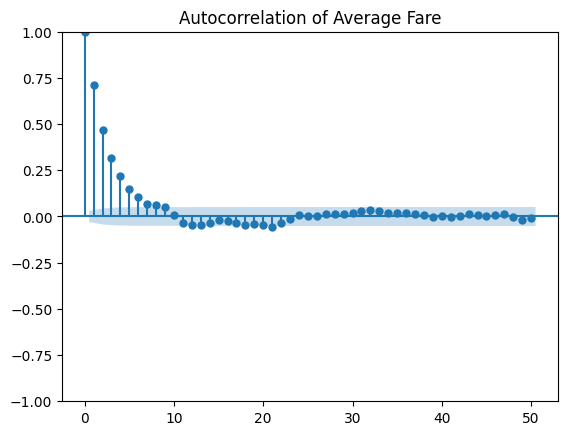

<Figure size 1000x500 with 0 Axes>

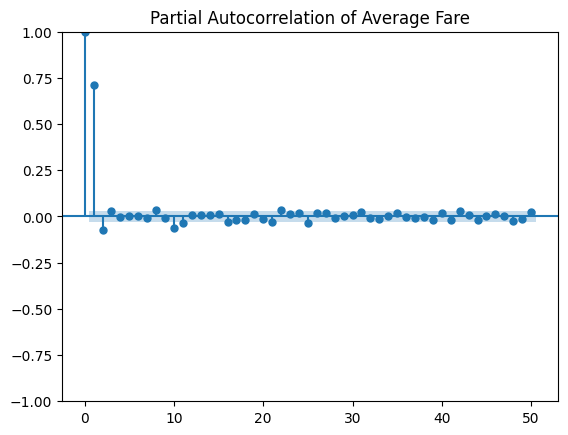

Data types after converting boolean columns to integers:
 weather_Clear     int64
weather_Cloudy    int64
weather_Rainy     int64
weather_Stormy    int64
dtype: object
                     weather_Clear  weather_Cloudy  weather_Rainy  \
timestamp                                                           
2022-12-02 04:00:00              0               0              1   
2022-12-02 05:00:00              1               0              0   
2022-12-02 06:00:00              0               0              0   
2022-12-02 07:00:00              1               0              0   
2022-12-02 08:00:00              1               0              0   

                     weather_Stormy  
timestamp                            
2022-12-02 04:00:00               0  
2022-12-02 05:00:00               0  
2022-12-02 06:00:00               1  
2022-12-02 07:00:00               0  
2022-12-02 08:00:00               0  
Exogenous variables data types:
 const                   float64
rides_completed  

/tmp/ipykernel_31/3927196440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[bool_columns] = data[bool_columns].astype(int)
/tmp/ipykernel_31/3927196440.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data.index.hour
/tmp/ipykernel_31/3927196440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

<Figure size 1000x500 with 0 Axes>

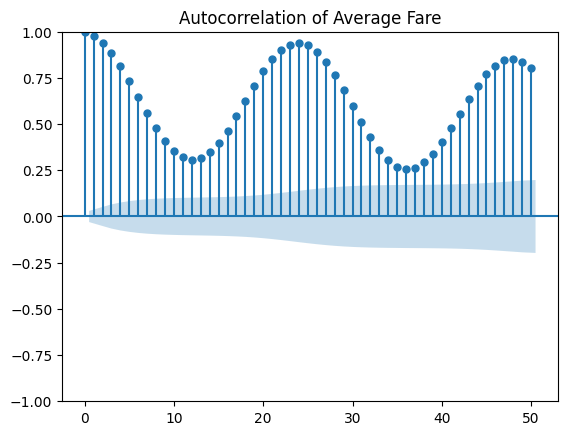

<Figure size 1000x500 with 0 Axes>

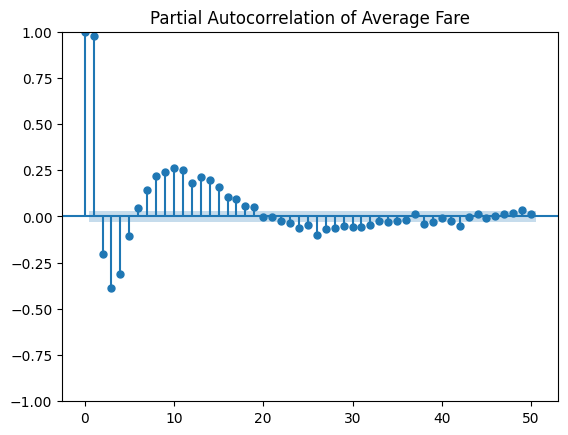

Data types after converting boolean columns to integers:
 weather_Clear     int64
weather_Cloudy    int64
weather_Rainy     int64
weather_Stormy    int64
dtype: object
                     weather_Clear  weather_Cloudy  weather_Rainy  \
timestamp                                                           
2022-12-02 04:00:00              0               0              1   
2022-12-02 05:00:00              0               0              0   
2022-12-02 06:00:00              1               0              0   
2022-12-02 07:00:00              0               0              0   
2022-12-02 08:00:00              0               1              0   

                     weather_Stormy  
timestamp                            
2022-12-02 04:00:00               0  
2022-12-02 05:00:00               1  
2022-12-02 06:00:00               0  
2022-12-02 07:00:00               1  
2022-12-02 08:00:00               0  
Exogenous variables data types:
 const                   float64
rides_completed  

/tmp/ipykernel_31/3927196440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[bool_columns] = data[bool_columns].astype(int)
/tmp/ipykernel_31/3927196440.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data.index.hour
/tmp/ipykernel_31/3927196440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

<Figure size 1000x500 with 0 Axes>

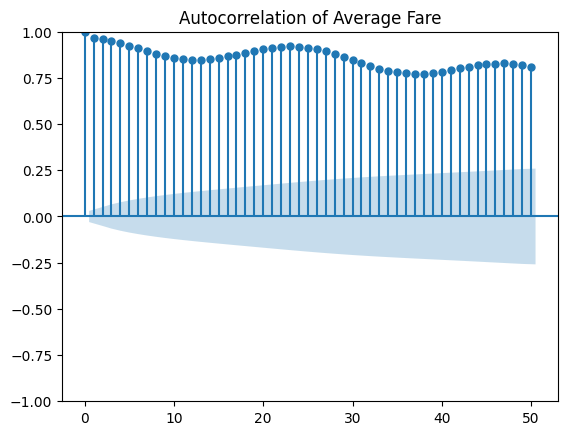

<Figure size 1000x500 with 0 Axes>

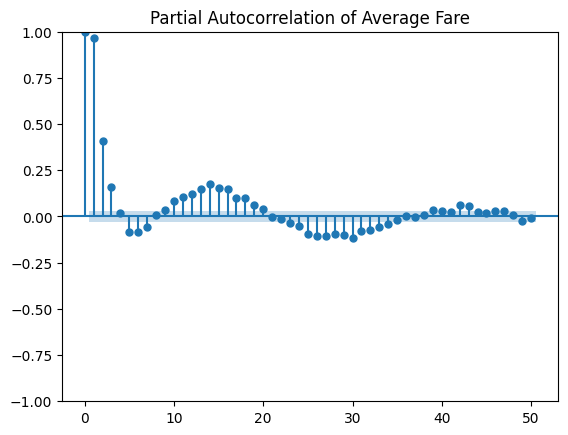

In [108]:
endog_auto_validation, exog_auto_validation = prepare_and_analyzedata(auto_validation)
endog_car_validation, exog_car_validation = prepare_and_analyzedata(car_validation)
endog_bike_validation, exog_bike_validation = prepare_and_analyzedata(bike_validation)

Data types after converting boolean columns to integers:
 weather_Clear     int64
weather_Cloudy    int64
weather_Rainy     int64
weather_Stormy    int64
dtype: object
                     weather_Clear  weather_Cloudy  weather_Rainy  \
timestamp                                                           
2021-01-01 00:00:00              1               0              0   
2021-01-01 01:00:00              1               0              0   
2021-01-01 02:00:00              1               0              0   
2021-01-01 03:00:00              0               1              0   
2021-01-01 04:00:00              0               0              1   

                     weather_Stormy  
timestamp                            
2021-01-01 00:00:00               0  
2021-01-01 01:00:00               0  
2021-01-01 02:00:00               0  
2021-01-01 03:00:00               0  
2021-01-01 04:00:00               0  
Exogenous variables data types:
 const                   float64
rides_completed  

<Figure size 1000x500 with 0 Axes>

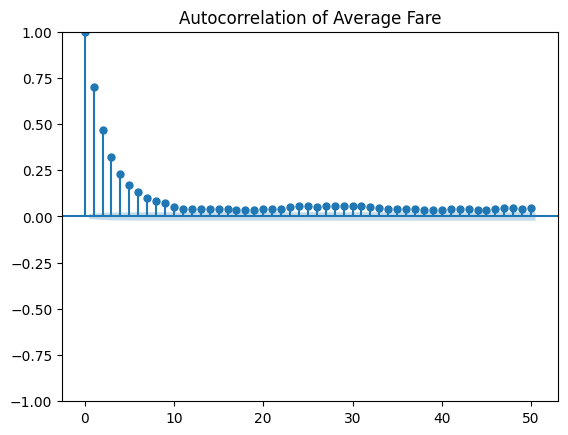

<Figure size 1000x500 with 0 Axes>

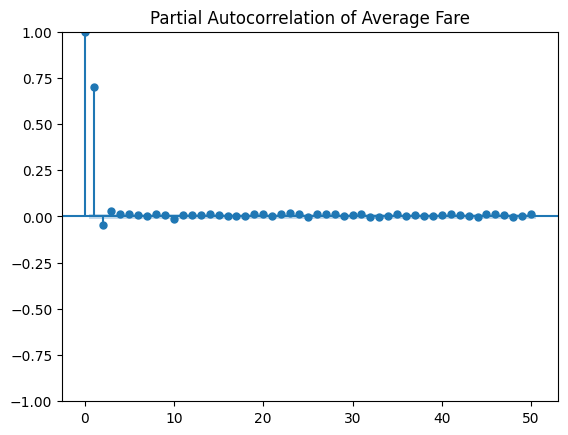

Data types after converting boolean columns to integers:
 weather_Clear     int64
weather_Cloudy    int64
weather_Rainy     int64
weather_Stormy    int64
dtype: object
                     weather_Clear  weather_Cloudy  weather_Rainy  \
timestamp                                                           
2021-01-01 00:00:00              1               0              0   
2021-01-01 01:00:00              1               0              0   
2021-01-01 02:00:00              1               0              0   
2021-01-01 03:00:00              1               0              0   
2021-01-01 04:00:00              0               0              1   

                     weather_Stormy  
timestamp                            
2021-01-01 00:00:00               0  
2021-01-01 01:00:00               0  
2021-01-01 02:00:00               0  
2021-01-01 03:00:00               0  
2021-01-01 04:00:00               0  
Exogenous variables data types:
 const                   float64
rides_completed  

<Figure size 1000x500 with 0 Axes>

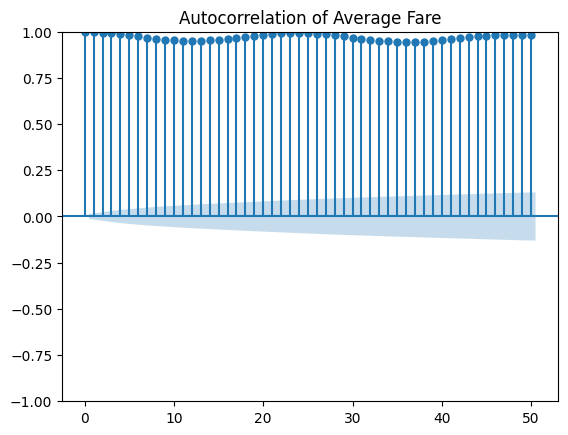

<Figure size 1000x500 with 0 Axes>

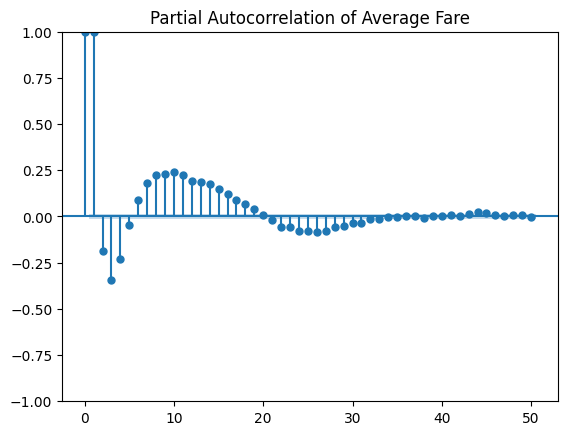

Data types after converting boolean columns to integers:
 weather_Clear     int64
weather_Cloudy    int64
weather_Rainy     int64
weather_Stormy    int64
dtype: object
                     weather_Clear  weather_Cloudy  weather_Rainy  \
timestamp                                                           
2021-01-01 00:00:00              1               0              0   
2021-01-01 01:00:00              0               0              0   
2021-01-01 02:00:00              0               1              0   
2021-01-01 03:00:00              1               0              0   
2021-01-01 04:00:00              1               0              0   

                     weather_Stormy  
timestamp                            
2021-01-01 00:00:00               0  
2021-01-01 01:00:00               1  
2021-01-01 02:00:00               0  
2021-01-01 03:00:00               0  
2021-01-01 04:00:00               0  
Exogenous variables data types:
 const                   float64
rides_completed  

<Figure size 1000x500 with 0 Axes>

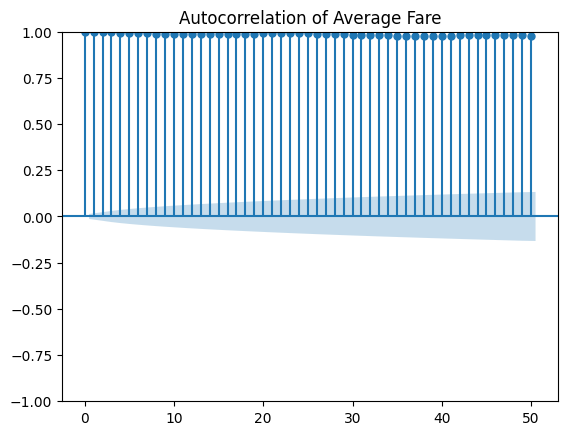

<Figure size 1000x500 with 0 Axes>

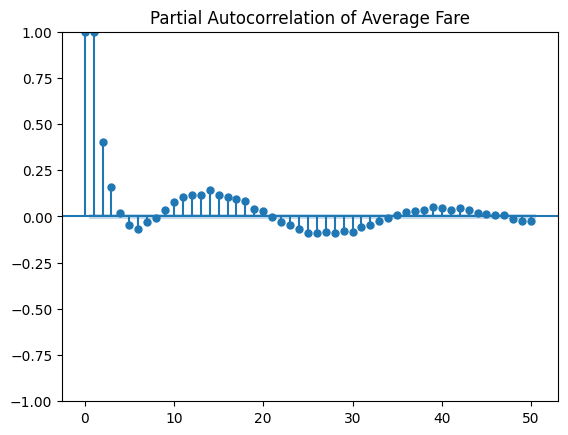

In [121]:
endog_auto_train, exog_auto_train = prepare_and_analyzedata(auto_train)
endog_car_train, exog_car_train = prepare_and_analyzedata(car_train)
endog_bike_train, exog_bike_train = prepare_and_analyzedata(bike_train)

In [122]:
exog_auto_test = prepare_and_analyzedata_test(auto_validation)
exog_car_test = prepare_and_analyzedata_test(car_validation)
exog_bike_test = prepare_and_analyzedata_test(bike_validation)

Data types after converting boolean columns to integers:
 weather_Clear     int64
weather_Cloudy    int64
weather_Rainy     int64
weather_Stormy    int64
dtype: object
                     weather_Clear  weather_Cloudy  weather_Rainy  \
timestamp                                                           
2023-05-26 05:00:00              0               0              1   
2023-05-26 06:00:00              0               1              0   
2023-05-26 07:00:00              1               0              0   
2023-05-26 08:00:00              1               0              0   
2023-05-26 09:00:00              1               0              0   

                     weather_Stormy  
timestamp                            
2023-05-26 05:00:00               0  
2023-05-26 06:00:00               0  
2023-05-26 07:00:00               0  
2023-05-26 08:00:00               0  
2023-05-26 09:00:00               0  
Data types after converting boolean columns to integers:
 weather_Clear     int64


# Step 3:
Let us fit a regression model using our engineered features. This will help you understand the influence of each feature on the target variable (average fare).

When we analyze the coefficients of the regression model, the absolute value of the coefficients can indicate the influence of each feature on the predictions.

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
exog_scaled = scaler.fit_transform(exog_car_train)

exog_scaled_df = pd.DataFrame(exog_scaled, columns=exog_car_train.columns, index=exog_car_train.index)

model = sm.OLS(endog_car_train, sm.add_constant(exog_scaled_df)).fit()


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
exog_scaled = scaler.fit_transform(exog_bike_train)

exog_scaled_df = pd.DataFrame(exog_scaled, columns=exog_bike_train.columns, index=exog_bike_train.index)

model = sm.OLS(endog_car_train, sm.add_constant(exog_scaled_df)).fit()


In [87]:

coefficients = model.params
p_values = model.pvalues

feature_importance = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
top_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=False).head(5)

print(top_features)


                Feature  Coefficient        P-Value  Absolute Coefficient
0                 const   121.951152   0.000000e+00            121.951152
2       rides_completed   -15.945956   0.000000e+00             15.945956
4      surge_multiplier     5.682410   5.561333e-86              5.682410
14        surge_traffic    -5.422206   2.091884e-19              5.422206
3   driver_availability     4.352501  4.045565e-203              4.352501


In [85]:

coefficients = model.params
p_values = model.pvalues

feature_importance = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
top_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=False).head(5)

print(top_features)


                 Feature  Coefficient        P-Value  Absolute Coefficient
0                  const   121.951152   0.000000e+00            121.951152
2        rides_completed   -16.209012   0.000000e+00             16.209012
14         surge_traffic   -15.740901   2.584156e-82             15.740901
4       surge_multiplier     9.816165  4.643190e-134              9.816165
15  availability_weekend     3.982758   3.951832e-10              3.982758


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
exog_scaled = scaler.fit_transform(exog_auto_train)

exog_scaled_df = pd.DataFrame(exog_scaled, columns=exog_auto_train.columns, index=exog_auto_train.index)

model = sm.OLS(endog_car_train, sm.add_constant(exog_scaled_df)).fit()


In [88]:

coefficients = model.params
p_values = model.pvalues

feature_importance = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
top_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=False).head(5)

print(top_features)


                Feature  Coefficient        P-Value  Absolute Coefficient
0                 const   121.951152   0.000000e+00            121.951152
2       rides_completed   -15.945956   0.000000e+00             15.945956
4      surge_multiplier     5.682410   5.561333e-86              5.682410
14        surge_traffic    -5.422206   2.091884e-19              5.422206
3   driver_availability     4.352501  4.045565e-203              4.352501


# Step 4:
For SARIMA, data needs to be stationary. Therefore we apply differencing until average_fare becomes stationary(determines d value). We perform ADF test to find out if data is stationary or not. If p-value of this test is <0.05 then data is stationary otherwise it is not.

In [89]:
from statsmodels.tsa.stattools import adfuller

dataframes = [car_train, bike_train, auto_train]
labels = ['Car', 'Bike', 'Auto']
column = 'average_fare' 

def check_stationarity_and_difference(df, label, column='average_fare'):
    d = 0
    series = df[column].copy()
    
    adf_result = adfuller(series)
    p_value = adf_result[1]

    if p_value < 0.05:
        print(f"{label} - Already stationary (no differencing needed). d=0")
        df[f'{column}_differenced'] = series  
    else:
        
        stationary = False
        while not stationary:
           
            series = series.diff() 
            d += 1
            adf_result = adfuller(series.dropna())
            p_value = adf_result[1]
            
            
            if p_value < 0.05:
                stationary = True
                print(f"{label} - Stationary achieved with d={d}")
                df[f'{column}_differenced'] = series
                
    df[f'{column}_differenced'] = df[f'{column}_differenced'].fillna(0)            
    return d

for df, label in zip(dataframes, labels):
    d_value = check_stationarity_and_difference(df, label)
    print(f"Final d-value for {label}: {d_value}\n")

for df, label in zip(dataframes, labels):
    print(f"\n{label} Data Sample with Differenced Column:")
    print(df[[f'{column}_differenced']].head())


Car - Stationary achieved with d=1
Final d-value for Car: 1

Bike - Stationary achieved with d=1
Final d-value for Bike: 1

Auto - Already stationary (no differencing needed). d=0
Final d-value for Auto: 0


Car Data Sample with Differenced Column:
                     average_fare_differenced
timestamp                                    
2021-01-01 00:00:00                  0.000000
2021-01-01 01:00:00                  0.969805
2021-01-01 02:00:00                  0.811388
2021-01-01 03:00:00                  0.611656
2021-01-01 04:00:00                  1.304422

Bike Data Sample with Differenced Column:
                     average_fare_differenced
timestamp                                    
2021-01-01 00:00:00                  0.000000
2021-01-01 01:00:00                 -0.008196
2021-01-01 02:00:00                  1.088771
2021-01-01 03:00:00                  1.123326
2021-01-01 04:00:00                 -1.083138

Auto Data Sample with Differenced Column:
                     

# Step 5:
We then plot ACF and PACF graphs to find out p,q values for our SARIMAX model for each vehicle dataframe. 

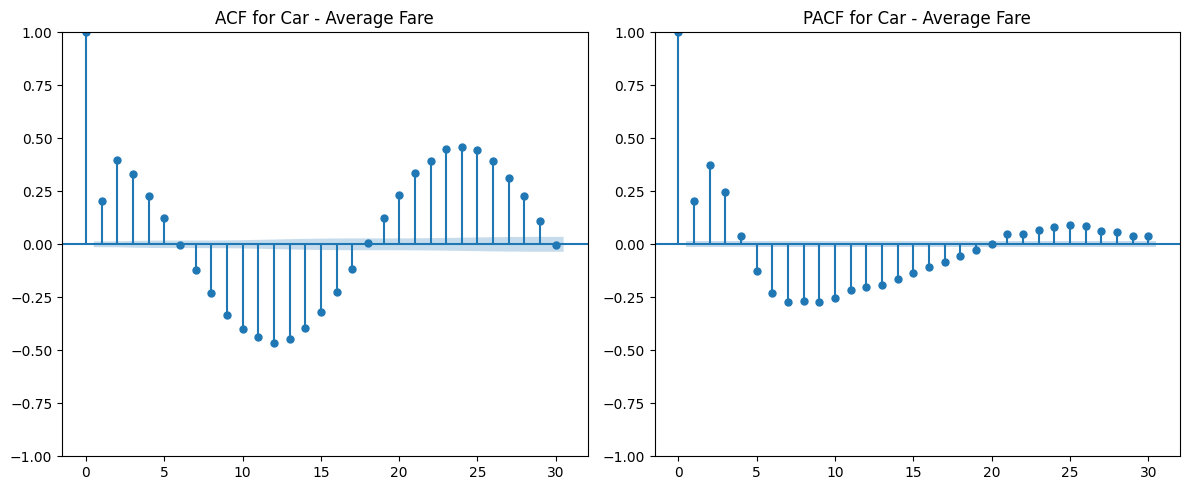

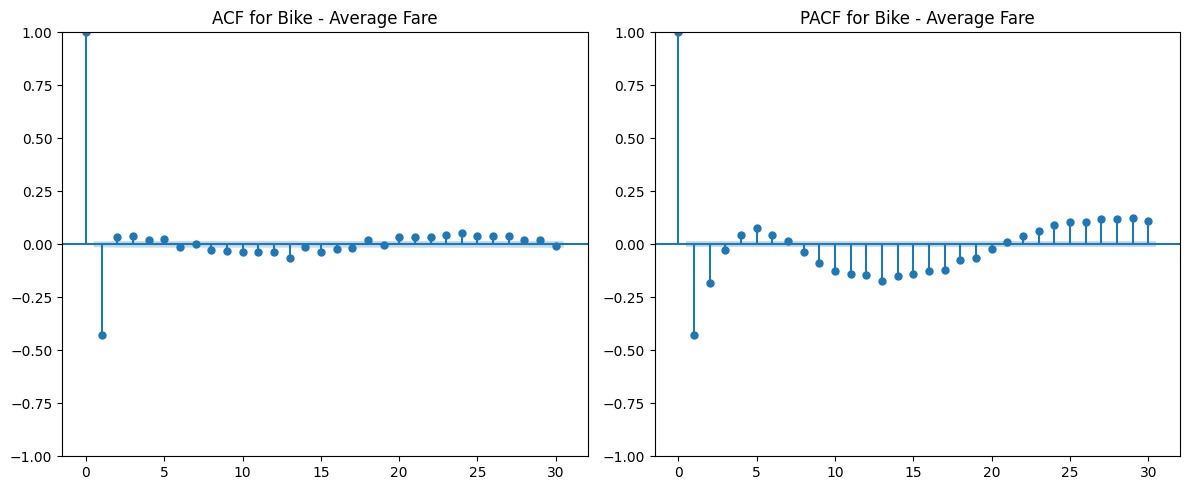

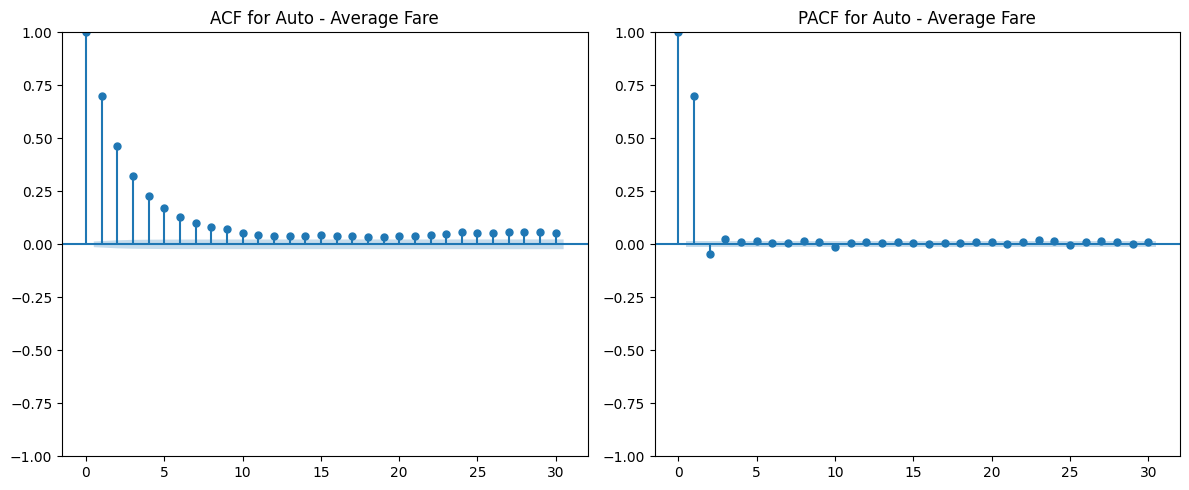

In [90]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dataframes = [car_train, bike_train, auto_train]
labels = ['Car', 'Bike', 'Auto']

for i, (df, label) in enumerate(zip(dataframes, labels), start=1):
    
    time_series_data = df['average_fare_differenced']
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plot_acf(time_series_data, lags=30, ax=plt.gca())
    plt.title(f'ACF for {label} - Average Fare')
    
    plt.subplot(1, 2, 2)
    plot_pacf(time_series_data, lags=30, ax=plt.gca(), method='ywm')
    plt.title(f'PACF for {label} - Average Fare')
    
    plt.tight_layout()
    plt.show()


From the graphs:
For car, p = 5, q = 6
For bike, p = 1, q = 1
For auto, p = 2, q = 10

# Step 6:
We now train our SARIMAX models. SARIMAX is a robust and flexible time series forecasting method that effectively captures seasonality, integrates exogenous variables, and provides a structured approach to modeling time-dependent data. These features make it particularly suitable for forecasting tasks in dynamic environments, such as ride-hailing fare predictions, where understanding the influence of time and external factors is crucial for making informed business decisions.

# CAR SARIMAX


In [107]:
mod = sm.tsa.statespace.SARIMAX(endog=endog_car_train, exog=exog_car_train, order=(5,1,6),seasonal_order=(0,1,1,24))
model_fit = mod.fit(maxiter=5)
model_fit.summary()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30686D+00    |proj g|=  3.49954D-01


 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate    5    f=  1.26520D+00    |proj g|=  1.97112D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   28      5      9      1     0     0   1.971D+00   1.265D+00
  F =   1.2651995731551784     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         average_fare   No. Observations:                16804
Model:             SARIMAX(5, 1, 6)x(0, 1, [1], 24)   Log Likelihood              -21260.414
Date:                              Sat, 02 Nov 2024   AIC                          42576.827
Time:                                      06:30:57   BIC                          42793.208
Sample:                                  01-01-2021   HQIC                         42648.227
                                       - 12-02-2022                                         
Covariance Type:                                opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.799e-13      0.000   1.45e-09      1.000      -0.000       0.000
rides_completed         -0.0010      0.000     -4.672      0.000      -0.001      -0.001
driver_availability      0.0140      0.001     12.319      0.000       0.012       0.016
surge_multiplier         0.0403      0.093      0.434      0.664      -0.142       0.222
traffic_index            0.0152      0.001     11.814      0.000       0.013       0.018
special_event            0.0059      0.028      0.207      0.836      -0.050       0.061
weather_Clear            0.0041      0.011      0.357      0.721      -0.018       0.026
weather_Cloudy           0.0297      0.013      2.302      0.021       0.004       0.055
weather_Rainy            0.0066      0.014      0.476      0.634      -0.020       0.034
weather_Stormy          -0.0403      0.021     -1.947      0.052      -0.081       0.000
hour                  4.044e-10      0.009    4.5e-08      1.000      -0.018       0.018
day_of_week             -0.0143      0.020     -0.698      0.485      -0.054       0.026
is_weekend               0.0507      0.116      0.436      0.663      -0.177       0.278
surge_traffic           -0.0087      0.001     -8.312      0.000      -0.011      -0.007
availability_weekend     0.0112      0.002      5.422      0.000       0.007       0.015
ar.L1                   -0.0968     95.604     -0.001      0.999    -187.477     187.284
ar.L2                    0.0081     39.990      0.000      1.000     -78.371      78.388
ar.L3                    0.0058     10.956      0.001      1.000     -21.467      21.479
ar.L4                    0.0049      2.470      0.002      0.998      -4.836       4.846
ar.L5                    0.0063      0.609      0.010      0.992      -1.187       1.199
ma.L1                   -0.0982     95.603     -0.001      0.999    -187.477     187.281
ma.L2                    0.0074     21.374      0.000      1.000     -41.886      41.901
ma.L3                    0.0050      6.448      0.001      0.999     -12.633      12.643
ma.L4                    0.0036      2.281      0.002      0.999      -4.467       4.474
ma.L5                    0.0066      1.149      0.006      0.995      -2.245       2.258
ma.L6                   -0.0038      1.512     -0.002      0.998      -2.968       2.960
ma.S.L24                -0.6932      0.008    -86.623      0.000      -0.709      -0.678
sigma2                   0.8444      0.011     79.775      0.000       0.824       0.865
===================================================================================
Ljung-Box (L1) (Q):                1158.22   Jarque-Bera (JB):               228.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.00
Prob(H) (two-sided):

In [109]:
test_data=car_validation
test_car_data_model=test_data.drop('average_fare',axis=1)
test_exog = sm.add_constant(test_car_data_model)
forecast = model_fit.get_forecast(steps=len(test_car_data_model), exog=exog_car_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

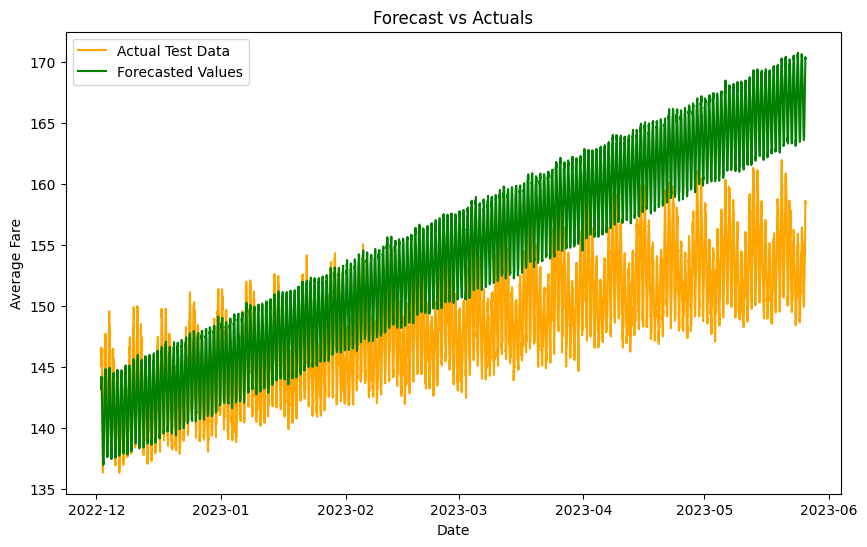

In [110]:
# Prepare data for plotting

car_data_plot =car_data.iloc[split_index_car:]  # Only the last 500 rows of the dataset
endog_plot = endog_car_validation   # Only the last 500 rows of the endogenous variable

# Plot forecast vs actuals
plt.figure(figsize=(10, 6))


# Plot actual test data (limited to the last 500 observations)
plt.plot(car_data_plot.index, car_data_plot['average_fare'], label='Actual Test Data', color='orange')

# Plot forecasted values for the test set
plt.plot(endog_plot.index, forecast_mean, label='Forecasted Values', color='green')


# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()


In [111]:
import numpy as np
import pandas as pd

# Assuming forecast_mean contains your predicted values from the model
# and car_data_plot contains the actual test data

# Extract the actual values from the test dataset
actual_values = car_data_plot['average_fare'].tail(len(forecast_mean)).values  # Ensure matching lengths

# Ensure there are no NaN values in the forecasted values or actual values
if np.any(np.isnan(forecast_mean)):
    print("Forecasted values contain NaN.")
if np.any(np.isnan(actual_values)):
    print("Actual values contain NaN.")

# Calculate SMAPE, handling zero division
numerator = np.abs(forecast_mean - actual_values)
denominator = np.abs(forecast_mean) + np.abs(actual_values)

# Avoid division by zero by setting the denominator to 1 where it's 0
denominator[denominator == 0] = 1

# Calculate SMAPE
smape = np.mean(numerator / denominator) * 100

# Print the result
print(f'SMAPE: {smape:.2f}%')


SMAPE: 1.91%


# BIKE SARIMAX

In [112]:
mod = sm.tsa.statespace.SARIMAX(endog=endog_bike_train, exog=exog_bike_train, order=(1,1,1),seasonal_order=(2,1,2,24))
model_fit = mod.fit(maxiter=5)
model_fit.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01210D+00    |proj g|=  8.61308D-01


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate    5    f=  1.00868D+00    |proj g|=  9.16179D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22      5     10      1     0     0   9.162D-01   1.009D+00
  F =   1.0086760464333708     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                            average_fare   No. Observations:                16804
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 24)   Log Likelihood              -16949.792
Date:                                 Sat, 02 Nov 2024   AIC                          33943.585
Time:                                         06:43:23   BIC                          34113.598
Sample:                                     01-01-2021   HQIC                         33999.684
                                          - 12-02-2022                                         
Covariance Type:                                   opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.031e-13   7.27e-10     -0.000      1.000   -1.43e-09    1.43e-09
rides_completed         -0.0005   4.26e-05    -10.965      0.000      -0.001      -0.000
driver_availability      0.0802      0.001    100.043      0.000       0.079       0.082
surge_multiplier         0.0334      0.095      0.352      0.725      -0.152       0.219
traffic_index            0.0064      0.002      4.182      0.000       0.003       0.009
special_event            0.0541      0.031      1.748      0.080      -0.007       0.115
weather_Clear           -1.1102      0.016    -70.226      0.000      -1.141      -1.079
weather_Cloudy          -0.7153      0.016    -44.064      0.000      -0.747      -0.683
weather_Rainy            0.4731      0.015     31.136      0.000       0.443       0.503
weather_Stormy           1.3523      0.022     62.618      0.000       1.310       1.395
hour                 -2.213e-12   4.07e-09     -0.001      1.000   -7.98e-09    7.97e-09
day_of_week              0.0046      0.013      0.358      0.721      -0.021       0.030
is_weekend              -0.0783      0.072     -1.086      0.277      -0.219       0.063
surge_traffic           -0.0015      0.001     -1.352      0.176      -0.004       0.001
availability_weekend     0.0171      0.001     17.432      0.000       0.015       0.019
ar.L1                    0.0211      0.014      1.495      0.135      -0.007       0.049
ma.L1                   -0.7387      0.010    -75.061      0.000      -0.758      -0.719
ar.S.L24                -0.5858      0.072     -8.190      0.000      -0.726      -0.446
ar.S.L48                -0.1635      0.013    -12.899      0.000      -0.188      -0.139
ma.S.L24                -0.2310      0.070     -3.286      0.001      -0.369      -0.093
ma.S.L48                -0.3419      0.058     -5.943      0.000      -0.455      -0.229
sigma2                   0.6437      0.005    126.255      0.000       0.634       0.654
===================================================================================
Ljung-Box (L1) (Q):                   9.34   Jarque-Bera (JB):             49392.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+24. Standard errors may be unstable.
"""

In [113]:
test_data=bike_validation
test_bike_data_model=test_data.drop('average_fare',axis=1)
test_exog = sm.add_constant(test_bike_data_model)
forecast = model_fit.get_forecast(steps=len(test_bike_data_model), exog=exog_bike_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

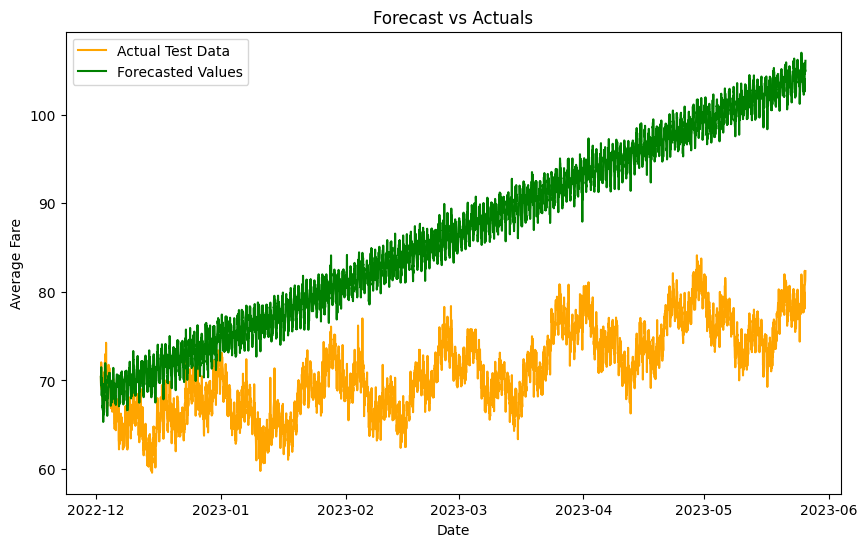

In [114]:
# Prepare data for plotting

bike_data_plot =bike_data.iloc[split_index_bike:]  # Only the last 500 rows of the dataset
endog_plot = endog_bike_validation   # Only the last 500 rows of the endogenous variable

# Plot forecast vs actuals
plt.figure(figsize=(10, 6))


# Plot actual test data (limited to the last 500 observations)
plt.plot(bike_data_plot.index,bike_data_plot['average_fare'], label='Actual Test Data', color='orange')

# Plot forecasted values for the test set
plt.plot(endog_plot.index, forecast_mean, label='Forecasted Values', color='green')


# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [115]:
import numpy as np
import pandas as pd

# Assuming forecast_mean contains your predicted values from the model
# and car_data_plot contains the actual test data

# Extract the actual values from the test dataset
actual_values = bike_data_plot['average_fare'].tail(len(forecast_mean)).values  # Ensure matching lengths

# Ensure there are no NaN values in the forecasted values or actual values
if np.any(np.isnan(forecast_mean)):
    print("Forecasted values contain NaN.")
if np.any(np.isnan(actual_values)):
    print("Actual values contain NaN.")

# Calculate SMAPE, handling zero division
numerator = np.abs(forecast_mean - actual_values)
denominator = np.abs(forecast_mean) + np.abs(actual_values)

# Avoid division by zero by setting the denominator to 1 where it's 0
denominator[denominator == 0] = 1

# Calculate SMAPE
smape = np.mean(numerator / denominator) * 100

# Print the result
print(f'SMAPE: {smape:.2f}%')


SMAPE: 9.48%


# AUTO SARIMAX

In [116]:
mod = sm.tsa.statespace.SARIMAX(endog=endog_auto_train, exog=exog_auto_train, order=(2,0,10),seasonal_order=(1,1,1,24))
model_fit = mod.fit(maxiter=5)
model_fit.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98849D+00    |proj g|=  1.01383D+00


 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate    5    f=  1.97989D+00    |proj g|=  9.35223D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   30      5      7      1     0     0   9.352D+00   1.980D+00
  F =   1.9798899309070808     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                          average_fare   No. Observations:                16804
Model:             SARIMAX(2, 0, 10)x(1, 1, [1], 24)   Log Likelihood              -33270.070
Date:                               Sat, 02 Nov 2024   AIC                          66600.141
Time:                                       06:51:01   BIC                          66831.979
Sample:                                   01-01-2021   HQIC                         66676.641
                                        - 12-02-2022                                         
Covariance Type:                                 opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.628e-12      1.036  -5.43e-12      1.000      -2.031       2.031
rides_completed         -0.0039      0.000    -32.765      0.000      -0.004      -0.004
driver_availability      0.0995      0.002     59.566      0.000       0.096       0.103
surge_multiplier         0.9917      0.198      5.018      0.000       0.604       1.379
traffic_index            0.0176      0.003      6.337      0.000       0.012       0.023
special_event           -0.0276      0.061     -0.449      0.654      -0.148       0.093
weather_Clear           -0.2486      0.151     -1.648      0.099      -0.544       0.047
weather_Cloudy          -0.0760      0.133     -0.570      0.569      -0.337       0.185
weather_Rainy            0.1127      0.139      0.811      0.418      -0.160       0.385
weather_Stormy           0.2119      0.128      1.656      0.098      -0.039       0.463
hour                  5.709e-12        nan        nan        nan         nan         nan
day_of_week              0.0429      0.009      4.650      0.000       0.025       0.061
is_weekend              -0.5215      0.110     -4.759      0.000      -0.736      -0.307
surge_traffic           -0.0113      0.002     -5.178      0.000      -0.016      -0.007
availability_weekend     0.0225      0.002      9.475      0.000       0.018       0.027
ar.L1                    0.0065   1212.034   5.35e-06      1.000   -2375.536    2375.549
ar.L2                    0.0041    236.115   1.72e-05      1.000    -462.772     462.780
ma.L1                    0.0066   1212.034   5.41e-06      1.000   -2375.535    2375.549
ma.L2                    0.0041    220.540   1.85e-05      1.000    -432.247     432.255
ma.L3                    0.0027      6.957      0.000      1.000     -13.633      13.638
ma.L4                    0.0018      1.507      0.001      0.999      -2.951       2.955
ma.L5                    0.0012      1.620      0.001      0.999      -3.174       3.177
ma.L6                    0.0009      1.103      0.001      0.999      -2.161       2.163
ma.L7                    0.0006      0.787      0.001      0.999      -1.543       1.544
ma.L8                    0.0004      0.495      0.001      0.999      -0.971       0.971
ma.L9                    0.0002      0.310      0.001      0.999      -0.607       0.607
ma.L10                4.153e-05      0.161      0.000      1.000      -0.315       0.315
ar.S.L24                -0.2863      0.010    -28.707      0.000      -0.306      -0.267
ma.S.L24                -0.4464      0.010    -43.796      0.000      -0.466      -0.426
sigma2                   3.0180      0.038     79.844      0.000       2.944       3.092
===================================================================================
Ljung-Box (L1) (Q):                5510.43   Jarque-Bera (JB):              3097.62
P

In [117]:
test_data=auto_validation
test_auto_data_model=test_data.drop('average_fare',axis=1)
test_exog = sm.add_constant(test_auto_data_model)
forecast = model_fit.get_forecast(steps=len(test_auto_data_model), exog=exog_auto_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

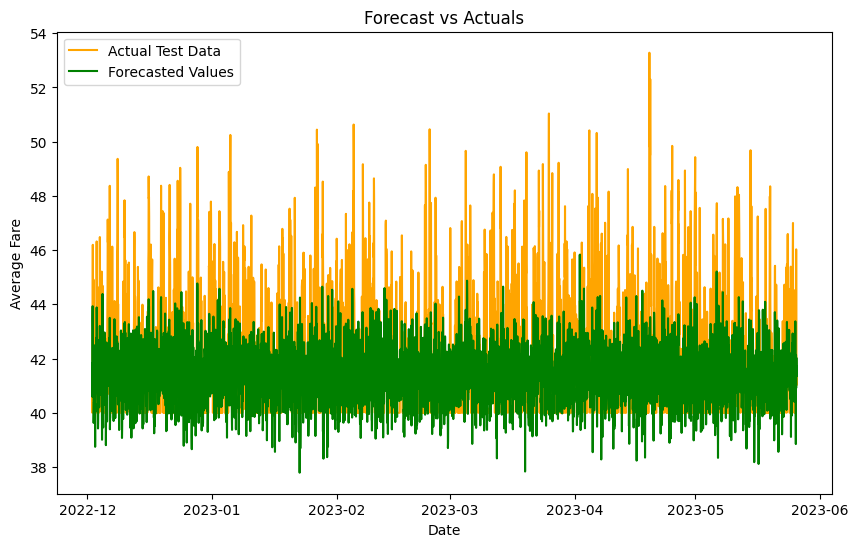

In [119]:
# Prepare data for plotting

auto_data_plot =auto_data.iloc[split_index_auto:]  # Only the last 500 rows of the dataset
endog_plot = endog_auto_validation   # Only the last 500 rows of the endogenous variable

# Plot forecast vs actuals
plt.figure(figsize=(10, 6))


# Plot actual test data (limited to the last 500 observations)
plt.plot(auto_data_plot.index,auto_data_plot['average_fare'], label='Actual Test Data', color='orange')

# Plot forecasted values for the test set
plt.plot(endog_plot.index, forecast_mean, label='Forecasted Values', color='green')


# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [38]:
import numpy as np
import pandas as pd

# Assuming forecast_mean contains your predicted values from the model
# and car_data_plot contains the actual test data

# Extract the actual values from the test dataset
actual_values = auto_data_plot['average_fare'].tail(len(forecast_mean)).values  # Ensure matching lengths

# Ensure there are no NaN values in the forecasted values or actual values
if np.any(np.isnan(forecast_mean)):
    print("Forecasted values contain NaN.")
if np.any(np.isnan(actual_values)):
    print("Actual values contain NaN.")

# Calculate SMAPE, handling zero division
numerator = np.abs(forecast_mean - actual_values)
denominator = np.abs(forecast_mean) + np.abs(actual_values)

# Avoid division by zero by setting the denominator to 1 where it's 0
denominator[denominator == 0] = 1

# Calculate SMAPE
smape = np.mean(numerator / denominator) * 100

# Print the result
print(f'SMAPE: {smape:.2f}%')

SMAPE: 1.98%


# Inference

Sarimax is able to capture trends and seasonality components, but not fully as we can see from the predicted vs actual graphs. A more advanced model like a deep learning model like LSTM may be able to perform better.
We have explored many such models in the next step and have chosen the best ones that suit our requirements.

### Task 4: Ensemble Modeling and Pricing Strategy (1 mark)

- Based on your work from previous tasks, analyze the relationships between fares of different vehicle types in Quahog City.
- Develop 3 different sophisticated forecasting models **(one for each vehicle type)**, with appropriate feature engineering for each vehicle type.

You must use the following 3 models for your forecasting:

1. ARIMA / ARIMAX / SARIMA / SARIMAX
2. Any method of your choice
3.  Any method of your choice that is NOT in the following list: Holt Winter's, ARIMA, ARIMAX, SARIMA, SARIMAX
   


Here are some models you can consider:
1) ARCH (https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
2) GARCH (https://www.investopedia.com/terms/g/garch.asp)
3) VAR (https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=VAR%20is%20a%20type%20of,economics%20and%20the%20natural%20sciences.)
4) XGBoost (https://en.wikipedia.org/wiki/XGBoost)

Explain the rationale behind your choice of model for the corresponding vehicle type.

RideWave are looking to create a unified model incorporating all 3 of the models you have developed.
- How would you go about implementing an ensemble modelling approach using all 3 models? 
##### (You don't have to write code for this, but the explanation must be detailed)





**AUTO**

Given that  auto_train dataframe is stationary with daily seasonality, here are three reasons why SARIMAX could be a good fit for the model:

Handles Seasonality Directly: SARIMAX (Seasonal ARIMA with eXogenous regressors) is designed to handle data with strong seasonal patterns. Since the data has daily seasonality, SARIMAX can model this seasonal component explicitly through the seasonal (S) parameters, making it a natural choice for capturing daily patterns.

Stationary Data Compatibility: SARIMAX performs well with stationary data, as it models the autoregressive (AR), moving average (MA), and seasonal components separately. Since the data is stationary, SARIMAX can fit the patterns without the need for further transformation to ensure stationarity.

Flexibility with Exogenous Variables: SARIMAX allows us to add exogenous variables (external factors) as predictors, which can improve model performance if other variables influence the target variable. This flexibility is helpful if we have additional predictors in your dataset that could affect the average fare.

In [91]:
mod = sm.tsa.statespace.SARIMAX(endog=endog_auto_train, exog=exog_auto_train, order=(1,0,1),seasonal_order=(1,1,1,24))
model_fit = mod.fit(maxiter=5)
model_fit.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86577D+00    |proj g|=  7.49227D+00


 This problem is unconstrained.



At iterate    5    f=  1.83098D+00    |proj g|=  9.88321D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20      5      8      1     0     0   9.883D-01   1.831D+00
  F =   1.8309796614387586     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       average_fare   No. Observations:                21005
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood              -38459.728
Date:                            Sat, 02 Nov 2024   AIC                          76959.456
Time:                                    06:08:40   BIC                          77118.483
Sample:                                01-01-2021   HQIC                         77011.364
                                     - 05-26-2023                                         
Covariance Type:                              opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -1.87e-11   6.86e-09     -0.003      0.998   -1.35e-08    1.34e-08
rides_completed         -0.0015      0.000    -11.197      0.000      -0.002      -0.001
driver_availability      0.0673      0.002     36.181      0.000       0.064       0.071
surge_multiplier         1.2199      0.211      5.773      0.000       0.806       1.634
traffic_index            0.0229      0.003      7.657      0.000       0.017       0.029
special_event           -0.0105      0.068     -0.155      0.877      -0.143       0.122
weather_Clear           -0.2527      0.029     -8.784      0.000      -0.309      -0.196
weather_Cloudy          -0.0981      0.032     -3.113      0.002      -0.160      -0.036
weather_Rainy            0.1183      0.032      3.698      0.000       0.056       0.181
weather_Stormy           0.2325      0.050      4.631      0.000       0.134       0.331
hour                 -3.525e-11   7.77e-08     -0.000      1.000   -1.52e-07    1.52e-07
day_of_week              0.0529      0.025      2.083      0.037       0.003       0.103
is_weekend              -0.4998      0.162     -3.085      0.002      -0.817      -0.182
surge_traffic           -0.0146      0.002     -6.166      0.000      -0.019      -0.010
availability_weekend     0.0099      0.003      3.420      0.001       0.004       0.016
ar.L1                    0.6296      0.012     50.994      0.000       0.605       0.654
ma.L1                   -0.0537      0.018     -3.060      0.002      -0.088      -0.019
ar.S.L24                -0.2891      0.015    -18.787      0.000      -0.319      -0.259
ma.S.L24                -0.4473      0.015    -29.295      0.000      -0.477      -0.417
sigma2                   3.4562      0.045     77.295      0.000       3.369       3.544
===================================================================================
Ljung-Box (L1) (Q):                 409.35   Jarque-Bera (JB):              2887.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+24. Standard errors may be unstable.
"""

In [92]:
test_data=auto_validation
test_auto_data_model=test_data
test_exog = sm.add_constant(test_auto_data_model)
forecast = model_fit.get_forecast(steps=len(test_auto_data_model), exog=exog_auto_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [93]:
forecast_mean

2023-05-26 05:00:00    42.367359
2023-05-26 06:00:00    44.102061
2023-05-26 07:00:00    41.637613
2023-05-26 08:00:00    41.419109
2023-05-26 09:00:00    42.676558
                         ...    
2023-12-30 20:00:00    41.571304
2023-12-30 21:00:00    43.427611
2023-12-30 22:00:00    42.237582
2023-12-30 23:00:00    41.953063
2023-12-31 00:00:00    41.264878
Freq: h, Name: predicted_mean, Length: 5252, dtype: float64

**BIKE**

Given that our bike_train dataset has daily and monthly seasonality along with an upward trend we decide to use TBATS.

The TBATS model (Trigonometric, Box-Cox transformation, ARMA errors, Trend, and Seasonal components) in statsmodels is designed to handle complex seasonal patterns with multiple seasonal cycles. It’s especially good for data with multiple seasonalities (e.g., daily, weekly, yearly).

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          172     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87212D+00    |proj g|=  9.88789D-01

At iterate    1    f=  1.67109D+00    |proj g|=  9.04148D-01

At iterate    2    f=  1.62819D+00    |proj g|=  8.98041D-01

At iterate    3    f=  1.59803D+00    |proj g|=  9.48197D-01

At iterate    4    f=  1.57521D+00    |proj g|=  9.41808D-01

At iterate    5    f=  1.55803D+00    |proj g|=  9.29696D-01

At iterate    6    f=  1.54817D+00    |proj g|=  7.95787D-01

At iterate    7    f=  1.54114D+00    |proj g|=  4.22720D-01

At iterate    8    f=  1.53614D+00    |proj g|=  1.21032D-01

At iterate    9    f=  1.53415D+00    |proj g|=  1.20370D-01

At iterate   10    f=  1.53373D+00    |proj g|=  1.15970D-01

At iterate   11    f=  1.53334D+00    |proj g|=  3.29049D-02

At iterate   12    f=  1.53327D+00    |proj g|=  6.01235D-03

At iterate   13    f=  1.5

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   62    f=  1.45002D+00    |proj g|=  7.69032D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  172     62     88     65     1     0   7.690D-02   1.450D+00
  F =   1.4500238833253221     

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        


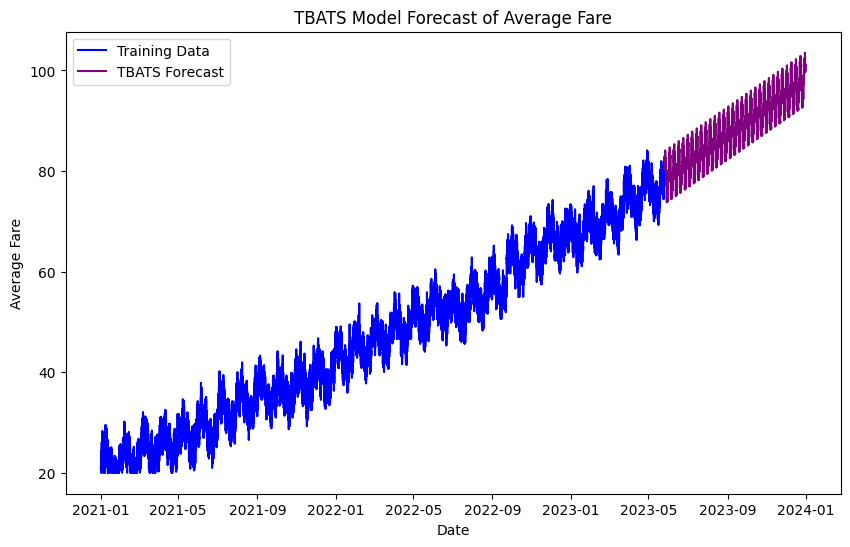

In [41]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

train = bike_train.copy()
test = bike_testfinal.copy()
# Fit TBATS model on training data
tbats_model = ETSModel(
    train['average_fare'],
    error="add",
    trend="add",
    seasonal="add",
    seasonal_periods=168  # Example for daily and weekly seasonality
)
tbats_fit = tbats_model.fit()

# Forecast for the test set period
tbats_forecast = tbats_fit.forecast(steps=len(test))

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['average_fare'], label='Training Data', color='blue')
plt.plot(test.index, tbats_forecast, label='TBATS Forecast', color='purple')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.title('TBATS Model Forecast of Average Fare')
plt.legend()
plt.show()


Another model we explored which seemed to give really good results : Prophet

rides_completed
driver_availability
surge_multiplier
traffic_index
special_event
weather_Clear
weather_Cloudy
weather_Rainy
weather_Stormy


04:06:12 - cmdstanpy - INFO - Chain [1] start processing
04:06:42 - cmdstanpy - INFO - Chain [1] done processing


Index(['ds', 'rides_completed', 'driver_availability', 'surge_multiplier',
       'traffic_index', 'special_event', 'weather_Clear', 'weather_Cloudy',
       'weather_Rainy', 'weather_Stormy', 'day_of_week', 'is_weekend',
       'surge_traffic', 'availability_weekend'],
      dtype='object')


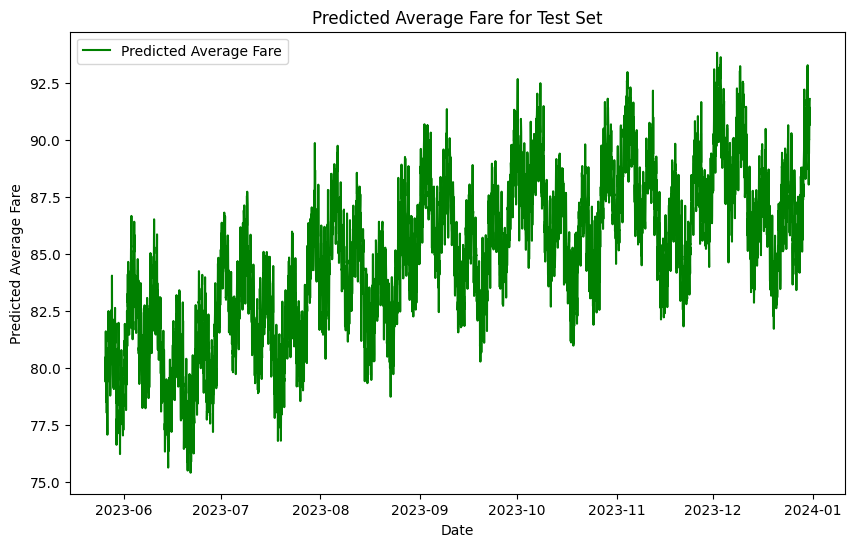

In [25]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index to make the timestamp available as a column
train = bike_train.reset_index()
test = bike_testfinal.reset_index()
# List of columns to drop
columns_to_drop = ["hour", "day_of_week", "is_weekend", "surge_traffic", "availability_weekend"]

# Dropping columns from the train DataFrame
train = train.drop(columns=columns_to_drop)

# Display the first few rows to confirm changes
train.head()

# Rename the 'timestamp' and 'average_fare' columns for Prophet compatibility in the training set
train = train.rename(columns={'timestamp': 'ds', 'average_fare': 'y'})
test = test.rename(columns={'timestamp':'ds'})
# Initialize the Prophet model
model_car = Prophet()

# Add monthly seasonality
# The 'period' parameter is set to 30.5 to approximate one month, and 'fourier_order' controls the flexibility of the seasonality
model_car.add_seasonality(name='monthly', period=30.5, fourier_order=5)


# Add additional attributes as regressors (assuming they are in train DataFrame)
for col in train.columns:
    if col not in ['ds', 'y']:
        print(col)
        model_car.add_regressor(col)
        
# Fit the model to the training data
model_car.fit(train)

# Prepare the future dataframe for prediction using only the timestamp and relevant features from test set
future = test[['ds'] + [col for col in test.columns if col != 'ds']]
future = test[['ds'] + [col for col in test.columns if col != 'ds' and col != 'hour']]
print(future.columns)
# Make predictions
forecast = model_car.predict(future)

# Plot predicted values (only since actual values aren't available in test set)
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Average Fare', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Predicted Average Fare')
plt.title('Predicted Average Fare for Test Set')
plt.legend()
plt.show()

**CAR USING PROPHET**

Given that our car_train dataframe has daily seasonality and an upward trend, here are three reasons why Prophet is a good match for this type of time series:

Built-in Handling of Seasonality: Prophet is designed to capture multiple seasonalities, including daily, weekly, and yearly patterns, without requiring complex parameter tuning. Since our data has a daily seasonality, Prophet can easily incorporate it, making it well-suited to model repeating daily cycles in the data.

Automatic Trend Detection and Flexibility: Prophet has a flexible trend component that can automatically detect and model upward, downward, or non-linear trends. Since our data has an upward trend, Prophet can capture this growth over time and also adjust if the trend changes (e.g., through changepoints) without extensive manual tuning.

Robust to Missing Data and Outliers: Prophet is robust to missing data and outliers, which is helpful for real-world datasets that may have irregularities. This robustness is especially useful in time series data with clear trends and seasonality, as Prophet maintains stability in its predictions while adapting to underlying seasonal and trend patterns.

06:19:25 - cmdstanpy - INFO - Chain [1] start processing
06:19:57 - cmdstanpy - INFO - Chain [1] done processing


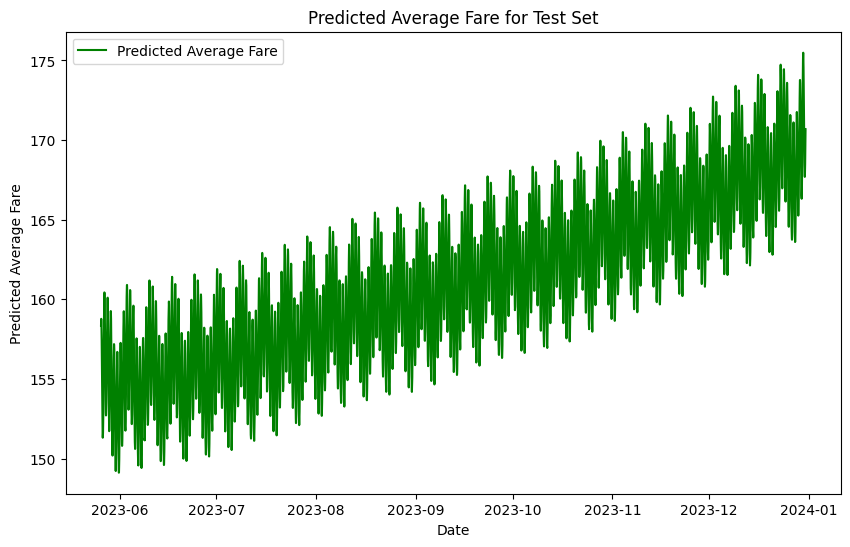

In [97]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

train = car_train.reset_index()
test = car_testfinal.reset_index()

train = train.rename(columns={'timestamp': 'ds', 'average_fare': 'y'})
test = test.rename(columns={'timestamp':'ds'})

model_car = Prophet(daily_seasonality=True)

regressors = [col for col in train.columns if col not in ['ds', 'y']]

for reg in regressors:
    if reg not in test.columns:
        test[reg] = 0 

for col in train.columns:
    if col not in ['ds', 'y']:
        model_car.add_regressor(col)

model_car.fit(train)

future = test[['ds'] + [col for col in test.columns if col != 'ds']]

forecast = model_car.predict(future)

plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Average Fare', color='green')

plt.xlabel('Date')
plt.ylabel('Predicted Average Fare')
plt.title('Predicted Average Fare for Test Set')
plt.legend()
plt.show()



In [98]:
forecast['yhat']

0       158.353054
1       158.741586
2       158.775342
3       158.578963
4       158.133983
           ...    
5247    168.021082
5248    168.503336
5249    169.214148
5250    170.066124
5251    170.681976
Name: yhat, Length: 5252, dtype: float64

## Ensemble approach  
1. Model Selection :
SARIMAX (Seasonal ARIMA with eXogenous factors): SARIMAX is a powerful time series model particularly effective for handling seasonal and trend patterns. It can also incorporate external variables (exogenous factors) like weather or events.   

SARIMAX will help capture:  

Seasonal trends that are consistent over time (like weekday vs. weekend trends).  
Stationary trends after differencing (if the data has a consistent upward or downward movement).  

Prophet: Developed by Facebook, Prophet is another popular time series forecasting model. It’s designed to handle:  

Holiday effects: Prophet allows the inclusion of specific dates (like holidays or special events) that may affect fare rates.
Sudden trend changes: Prophet can capture shifts in the trend that SARIMAX might miss, especially useful in data that experiences sudden jumps (e.g., an unexpected event that affects traffic patterns).  
Outliers: Prophet is robust against outliers, making it a strong model when the data contains occasional, unpredictable spikes.  

Random Forest Regressor: This machine learning model can capture non-linear relationships between the input features and the target variable. It’s valuable when:  

The relationship between predictors and fare rate isn’t strictly linear (e.g., traffic index or weather impacts).
There may be complex interactions between variables, like how traffic and day of the week together influence fare rates.
Each of these models has unique strengths. SARIMAX captures long-term seasonality and trends; Prophet handles trend shifts, holidays, and outliers well; and Random Forest captures non-linear interactions that may be missed by the other models.

2.Making Predictions with Each Model  
After training each model independently on each vehicle type, we move to making predictions:  

SARIMAX predictions will focus on capturing seasonal and trend components.  
Prophet will produce predictions that incorporate trend changes and seasonal patterns but will adjust better for holidays or anomalies.  
Random Forest will add predictions based on the interactions between features, which might include complex relationships between traffic, time of day, weather, etc.  
Each model will generate a separate forecast for each vehicle type (auto, bus, car), providing a unique perspective on what the average fare might be.   

3. Combining Predictions Using an Ensemble Method  
Now that we have predictions from each model, the next step is to combine them to form a final forecast. This ensemble approach allows us to leverage each model’s strengths:  

Weighted Average: A common approach is to assign weights to each model’s predictions and take a weighted average. For example:  

Assign a higher weight to SARIMAX if we expect strong seasonality.  
Give Prophet a higher weight if we know that holiday effects or outliers are prominent.  
Random Forest may get a higher weight if complex, non-linear relationships heavily influence fares.  
Fine-tuning these weights is often done based on validation performance: you test the ensemble on a portion of the data not used for training, adjusting the weights to minimize forecasting error.  

In [99]:
submission2=pd.DataFrame()
submission2['timestamp'] = tbats_forecast.index
submission.head()

In [52]:
submission2['average_fare_bike'] = tbats_forecast.values
submission2.head()

,timestamp,average_fare_bike
0,2023-05-26 05:00:00,82.407130
1,2023-05-26 06:00:00,82.975173
2,2023-05-26 07:00:00,82.507514
3,2023-05-26 08:00:00,82.719876
4,2023-05-26 09:00:00,82.755880


In [53]:
submission2['average_fare_auto'] = forecast_mean.values
submission2.head()

,timestamp,average_fare_bike,average_fare_auto
0,2023-05-26 05:00:00,82.407130,42.367359
1,2023-05-26 06:00:00,82.975173,44.102061
2,2023-05-26 07:00:00,82.507514,41.637613
3,2023-05-26 08:00:00,82.719876,41.419109
4,2023-05-26 09:00:00,82.755880,42.676558


In [54]:
submission2['average_fare_car'] = forecast['yhat'] 
submission2.head()

,timestamp,average_fare_bike,average_fare_auto,average_fare_car
0,2023-05-26 05:00:00,82.407130,42.367359,158.572114
1,2023-05-26 06:00:00,82.975173,44.102061,158.818406
2,2023-05-26 07:00:00,82.507514,41.637613,158.722194
3,2023-05-26 08:00:00,82.719876,41.419109,158.375325
4,2023-05-26 09:00:00,82.755880,42.676558,157.895921


In [61]:
submission2.to_csv('submission3.csv', index = False)

## Example submission, just for your reference

In [ ]:
submission = pd.DataFrame()
sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv')


## We have used a sample-submission just to show you the format your submission should be in, you have to use your OWN forecasts while making submissions


In [ ]:
submission['timestamp'] = sample_submission['timestamp']
submission['average_fare_bike'] = sample_submission['average_fare_bike']
submission['average_fare_auto'] = sample_submission['average_fare_auto']
submission['average_fare_car'] = sample_submission['average_fare_car']

In [ ]:
submission.head()

In [41]:
submission.to_csv('submission2.csv', index = False)

## Congratulations! 🎉

You've done it! You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-2, and that's something to be truly proud of! This achievement shows just how much you've grown in your ability to tackle time-series modeling and analysis.

### Here’s what you’ve accomplished:
- You applied data analytics concepts to solve real-world problems.
- You developed time-series models, a skill that’s essential in fields like finance (think stock predictions) and healthcare (monitoring vitals)—and many more!

### What's next:
With this experience, you’ve laid a solid foundation for real-world data modeling and time-series analysis. The techniques you’ve mastered here will be incredibly valuable in many data science and machine learning projects, no matter the industry.

But remember, this is just the start of your journey in data science! Keep learning, keep pushing yourself, and most importantly, keep having fun with it. You're ready for even more exciting and challenging projects.

**Huge congrats once again, and wishing you all the best for your ISAs and ESAs! You've got this! 🌟** 